## Exercise 1

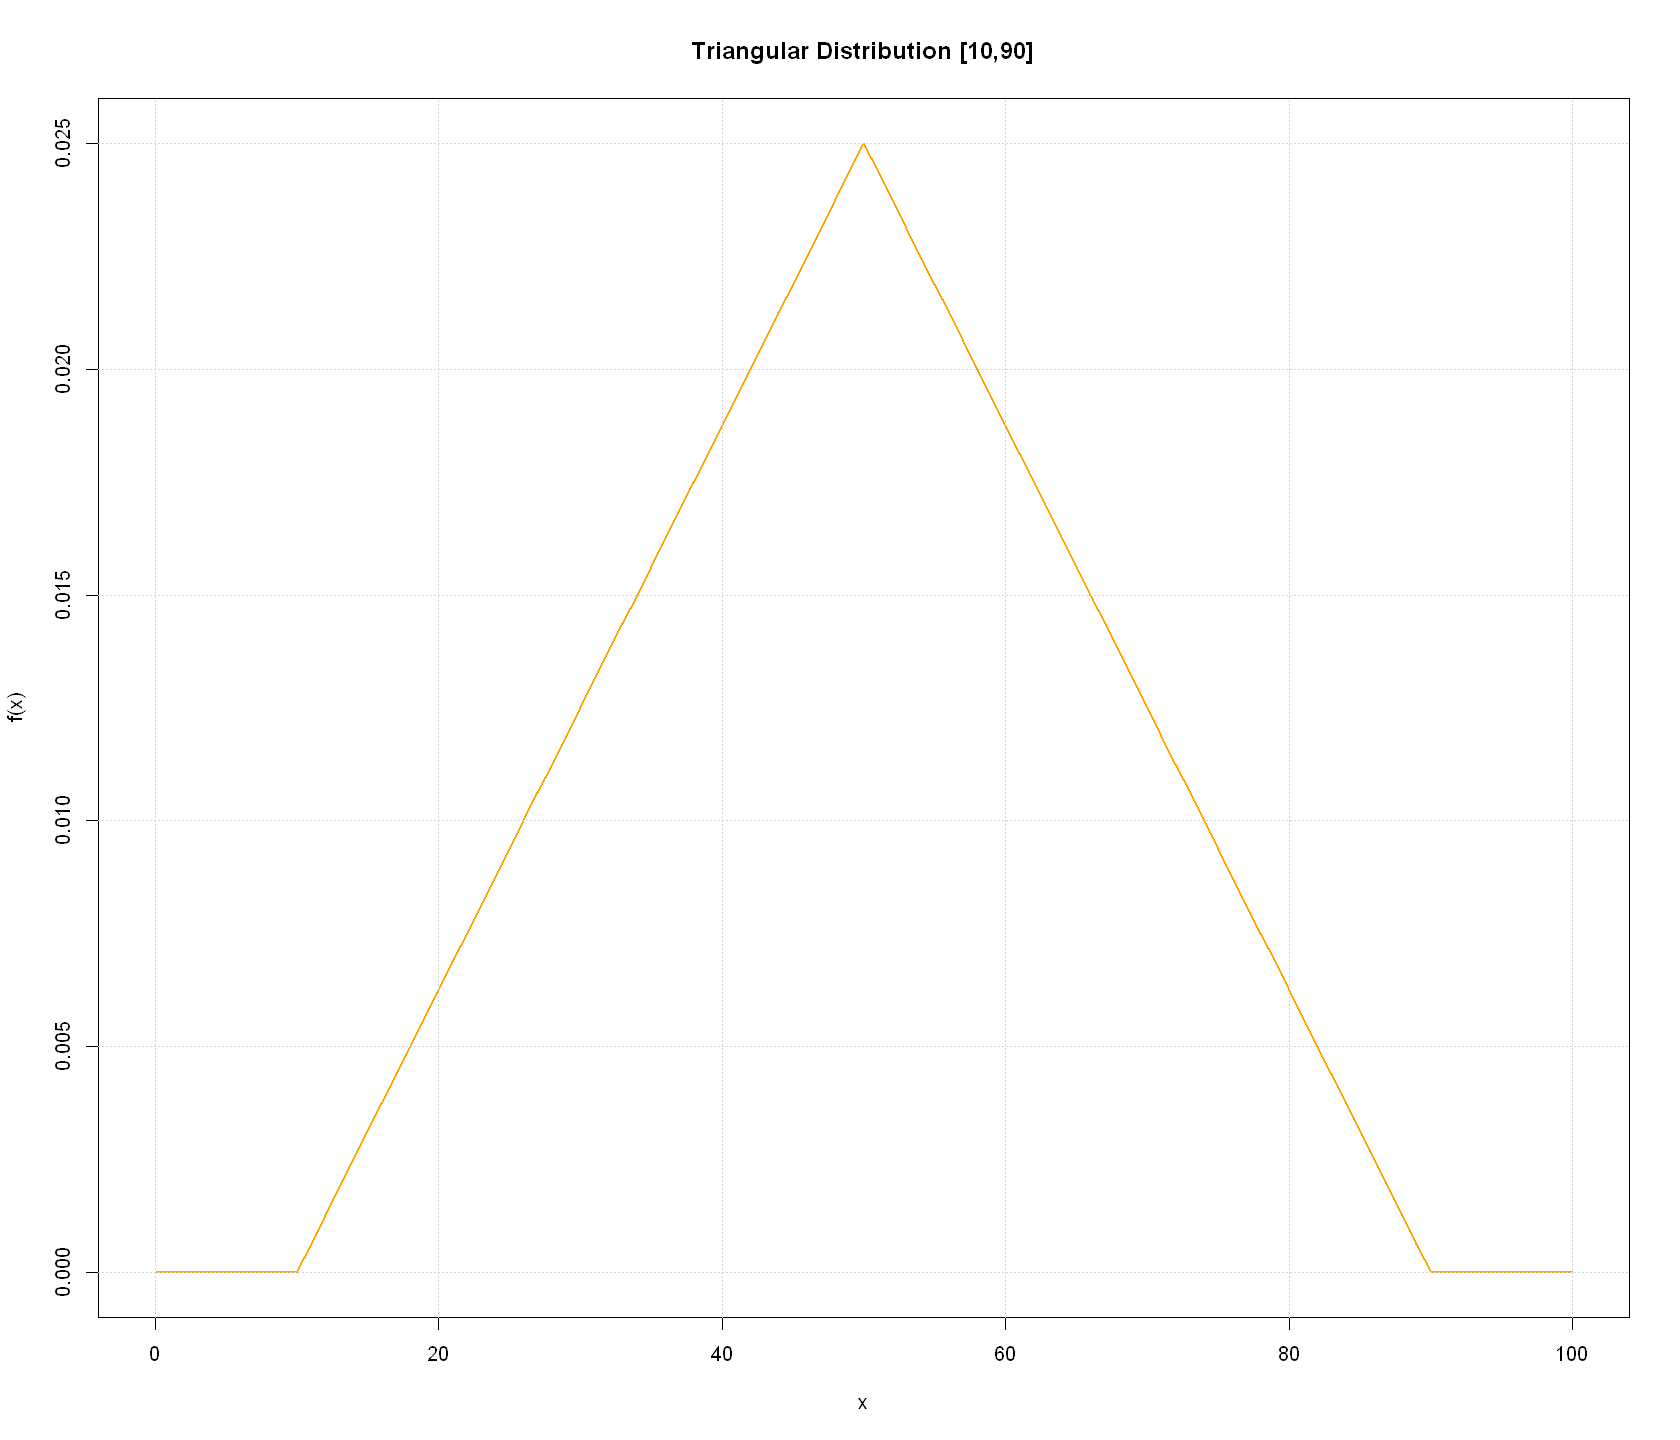

In [245]:
tri<-function(x,a,b){
    c<-(b+a)/2 #it can be chosen whatever other rule for c, the only condition is that a<c<b
    if (x>=a & x<c){
        r<-2*(x-a)/((b-a)*(c-a))
    }
    else if (x>=c & x<=b){
        r<-2*(b-x)/((b-a)*(b-c))
    }
    else{
        r<-0
    }
    return(r)
}

#a) plot the function, given the interval (a, b)
tri<-Vectorize(tri)
range<-seq(from=0, to=100,by=1)
plot(range,tri(range,10,90),type="l",col="orange",lwd="2",xlab="x",ylab="f(x)",main="Triangular Distribution [10,90]")
grid()

To generate the sampling function, the analytical forms of the cumulative and then of the quantile function are required.

Analytical form of the cumulative:
$$
cdf(x)=
\begin{equation}
\begin{cases}
\frac{2}{(b-a)(c-a)} \int_{a}^{x}{dx'(x'-a)} = \frac{(x-a)^2}{(b-a)(c-a)}\textit{  }\textit{  }\textit{  }  \textit{     if } a \leq x < c \\
\frac{2}{(b-a)(b-c)} \int_{c}^{x}{dx'(b-x')} = 1-\frac{(x-b)^2}{(b-a)(b-c)}\textit{  }\textit{  }\textit{  }   \textit{     if } c \leq x \leq b \\
0  \textit{     else}
\end{cases}
\end{equation}
$$

The condition on the probability p for the quantile function is:
$$
cdf(c)=\frac{c-a}{b-a}
$$

Analytical form of the quantile function:
$$
q(p)=cdf^{-1}(p)=
\begin{cases}
\sqrt{p(b-a)(c-a)}+a \textit{  }\textit{  }\textit{  } \textit{   if   } 0 \leq p < \frac{c-a}{b-a} \\
b - \sqrt{(b-c)(1-p)(b-a)} \textit{  }\textit{  }\textit{  }  \textit{    if    } \frac{c-a}{b-a} \leq p \leq 1 
\end{cases}
$$

In [246]:
#b) and write an algorithm to generate random numbers from the triangular distribution

samp <- function(n, a, b){
    c<-(b+a)/2
    d<-(c−a)/(b−a)
    rand <- runif(n, 0, 1)
    r <- ifelse((rand <d),
                a + sqrt((b-a)*(c-a)*rand),
                b - sqrt((b-a)*(b-c)*(1-rand))
               )
    return(r)
}

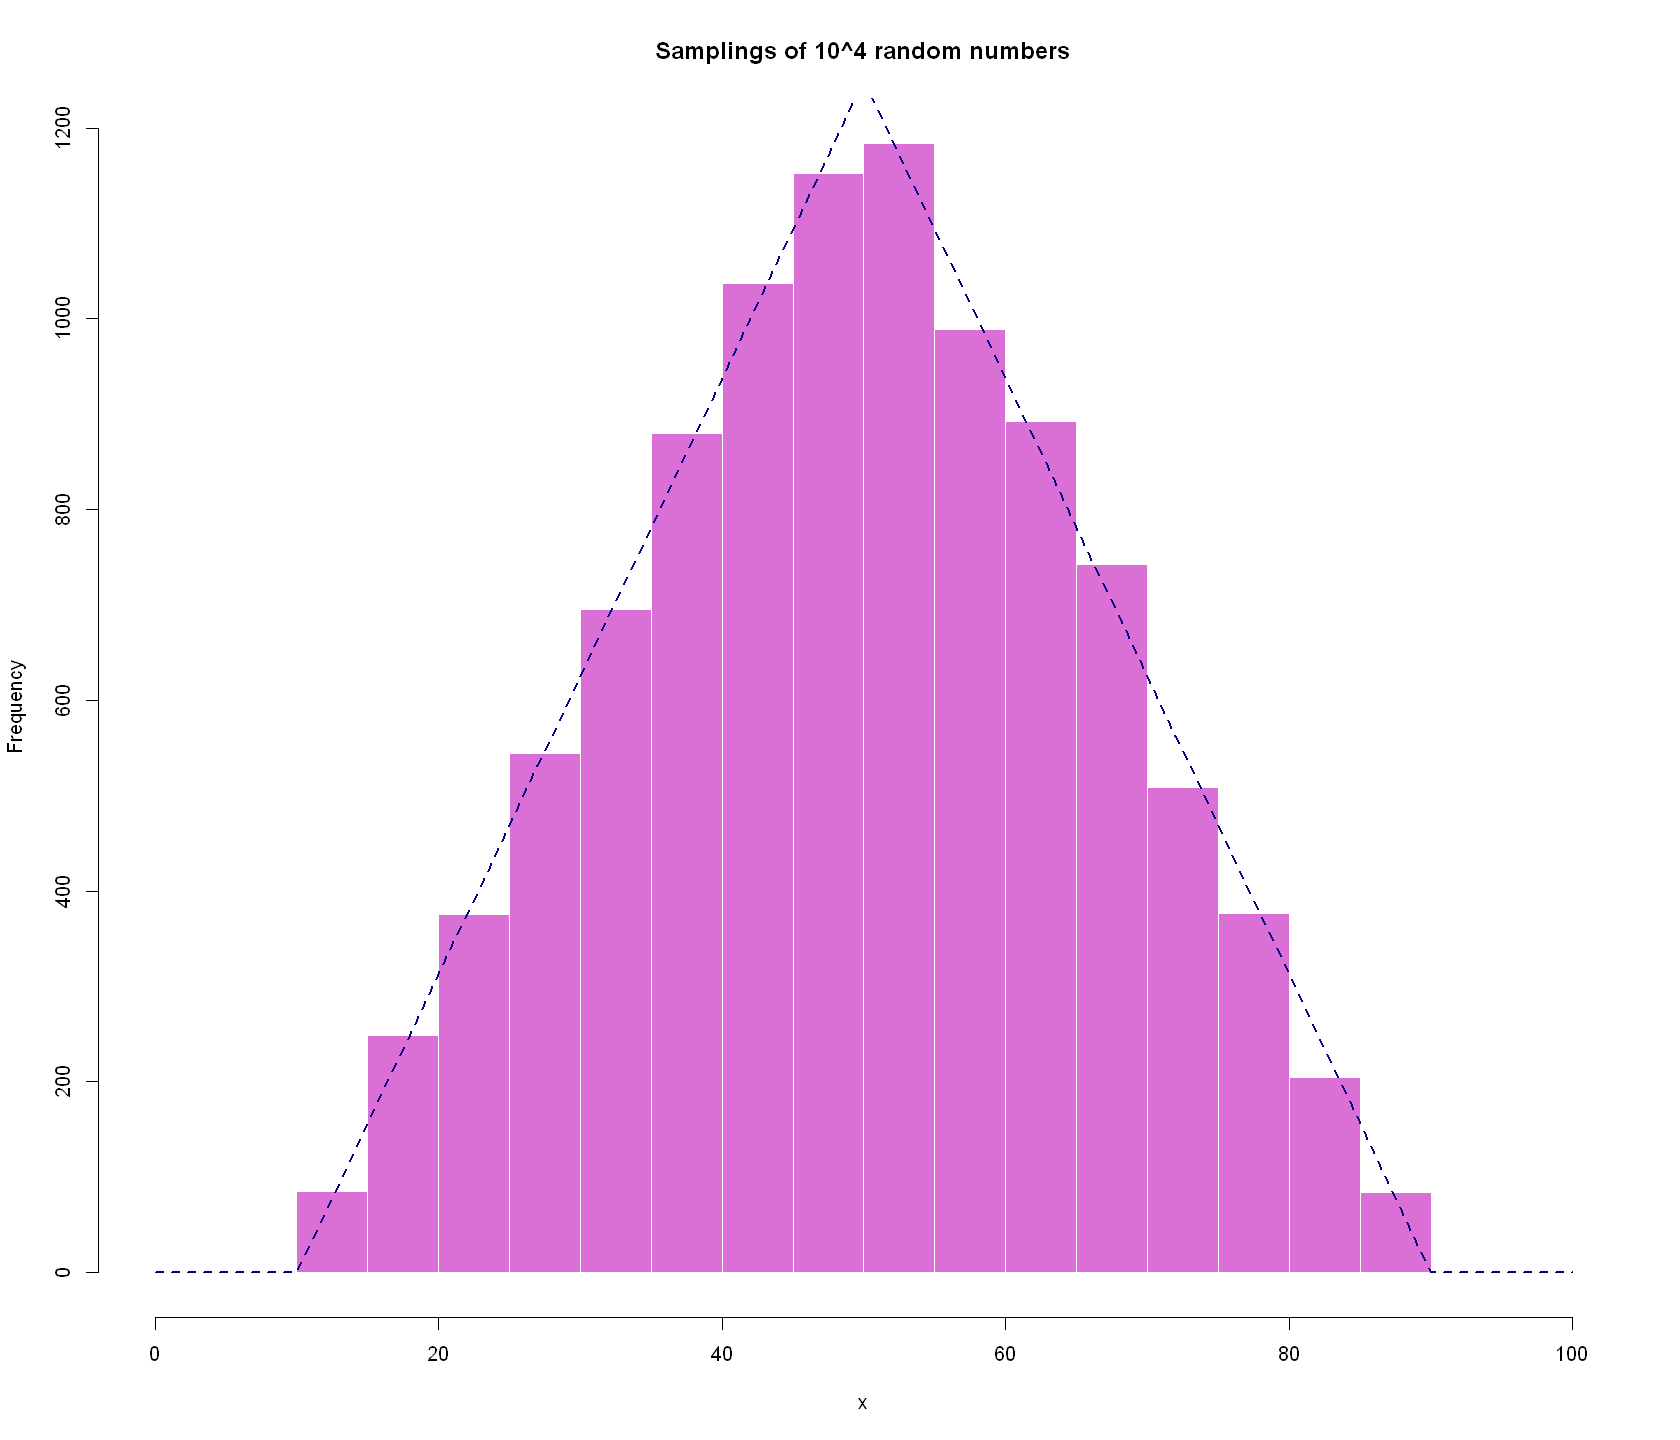

In [247]:
#c) generate 10^4 random number from the distribution, show them in an histogram and superimpose the analytical curve
data<-samp(10^4,10,90)
histo<-hist(data, breaks=seq(0,100,l=21),col="orchid",xlab="x",main="Samplings of 10^4 random numbers",border="white")
lines(range, 10^4*(histo$breaks[2]-histo$breaks[1])*tri(range, 10,90), lwd=2, col="navyblue", lty="dashed")

## Exercise 2

a) Exponential distribution

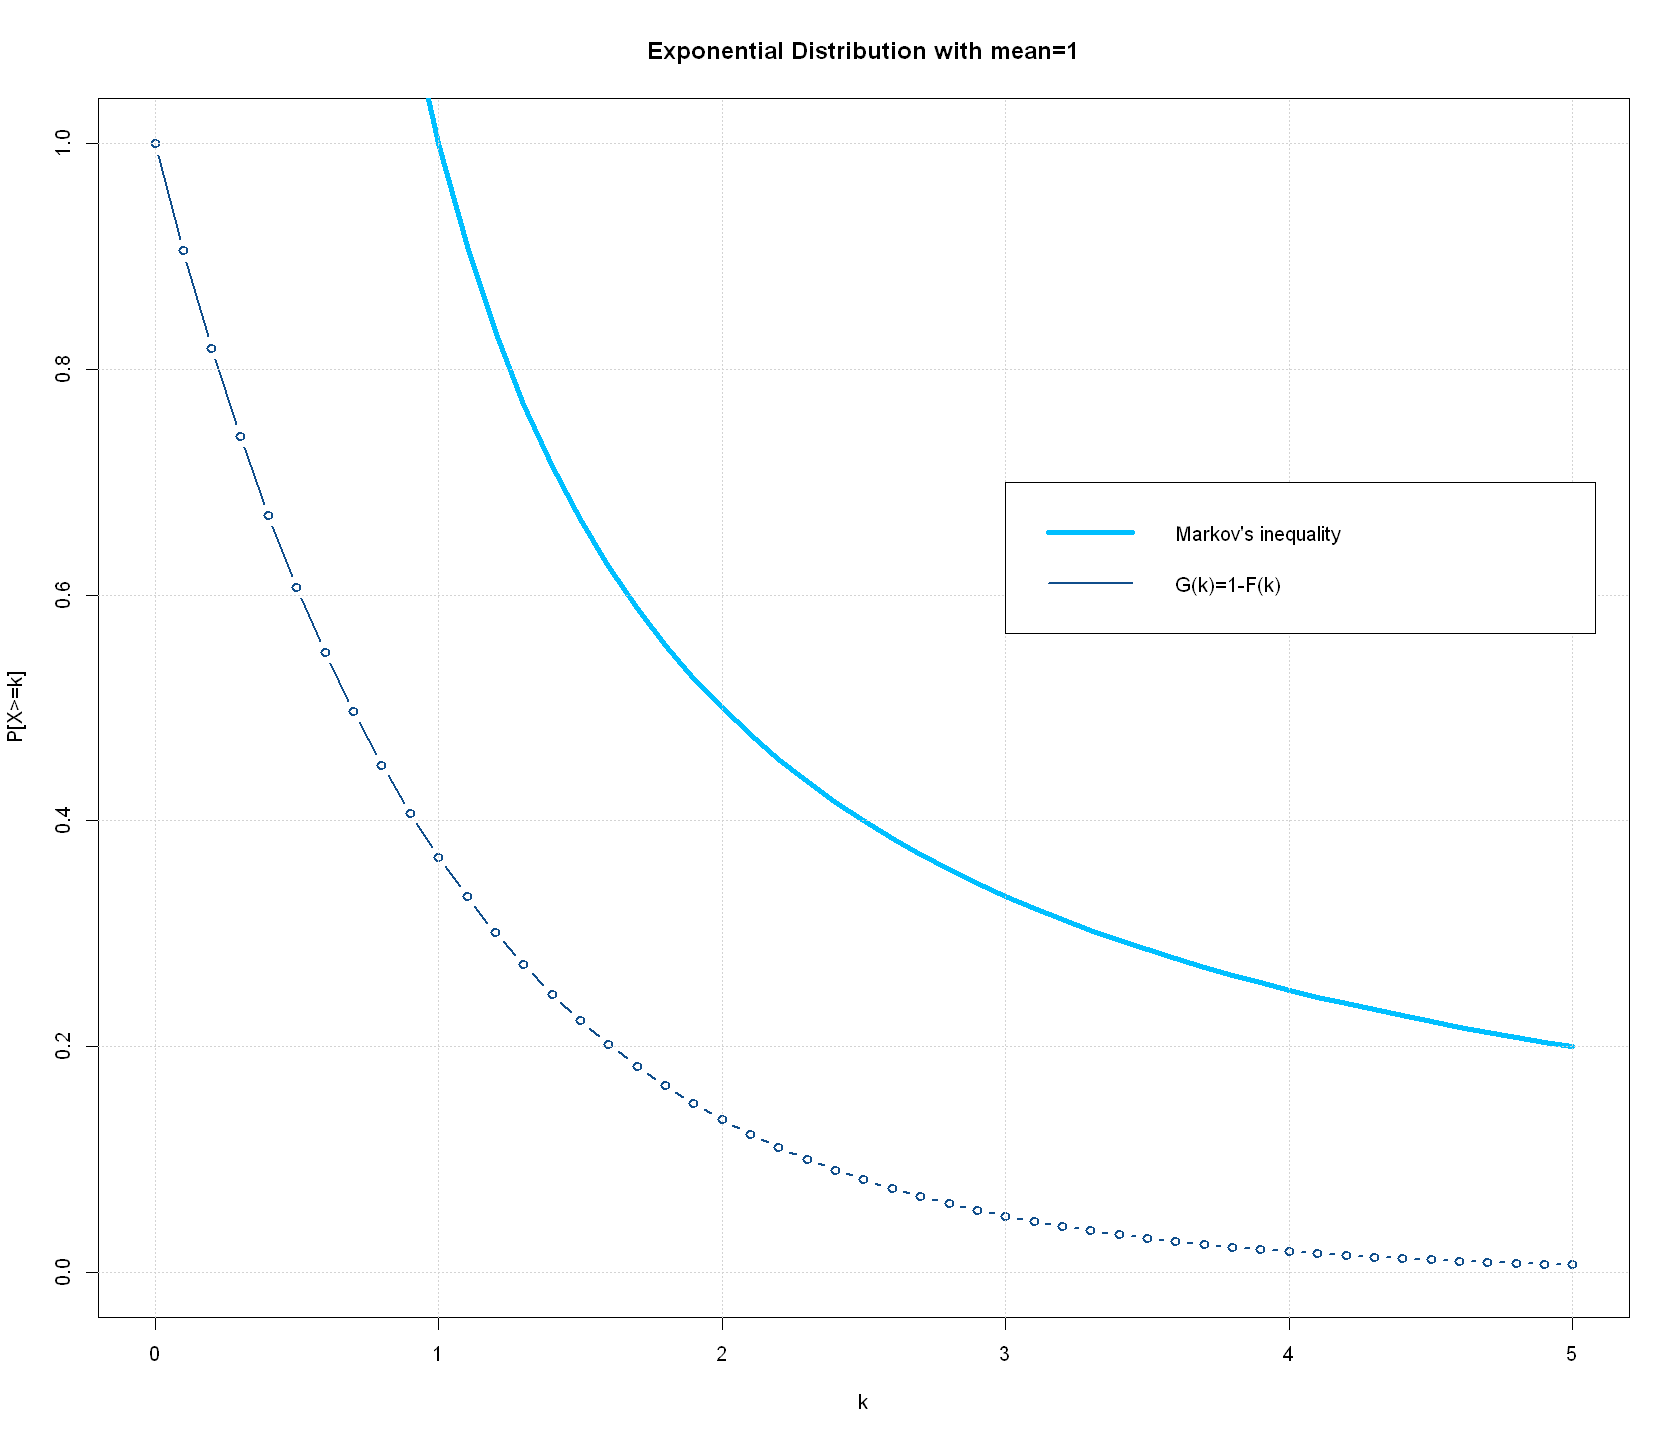

In [459]:
M_exp<-function(k){
    return(1/k)
}
G_exp<-function(k){
    return(1-pexp(k,1))
}
k_range<-seq(from=0,to=5,by=0.1)
prob<-seq(from=0,to=1,by=1/50)
plot(k_range, prob, type="n",xlab="k",ylab="P[X>=k]",main="Exponential Distribution with mean=1")
lines(k_range, M_exp(k_range),col="deepskyblue",lwd="4")
lines(k_range, G_exp(k_range),col="dodgerblue4",lwd="2",type="b")
grid()
legend(3,0.7,legend=c("Markov's inequality","G(k)=1-F(k)"),lty=c(1,1),lwd=c(4,2),col=c("deepskyblue", "dodgerblue4"))

b) Uniform Distribution

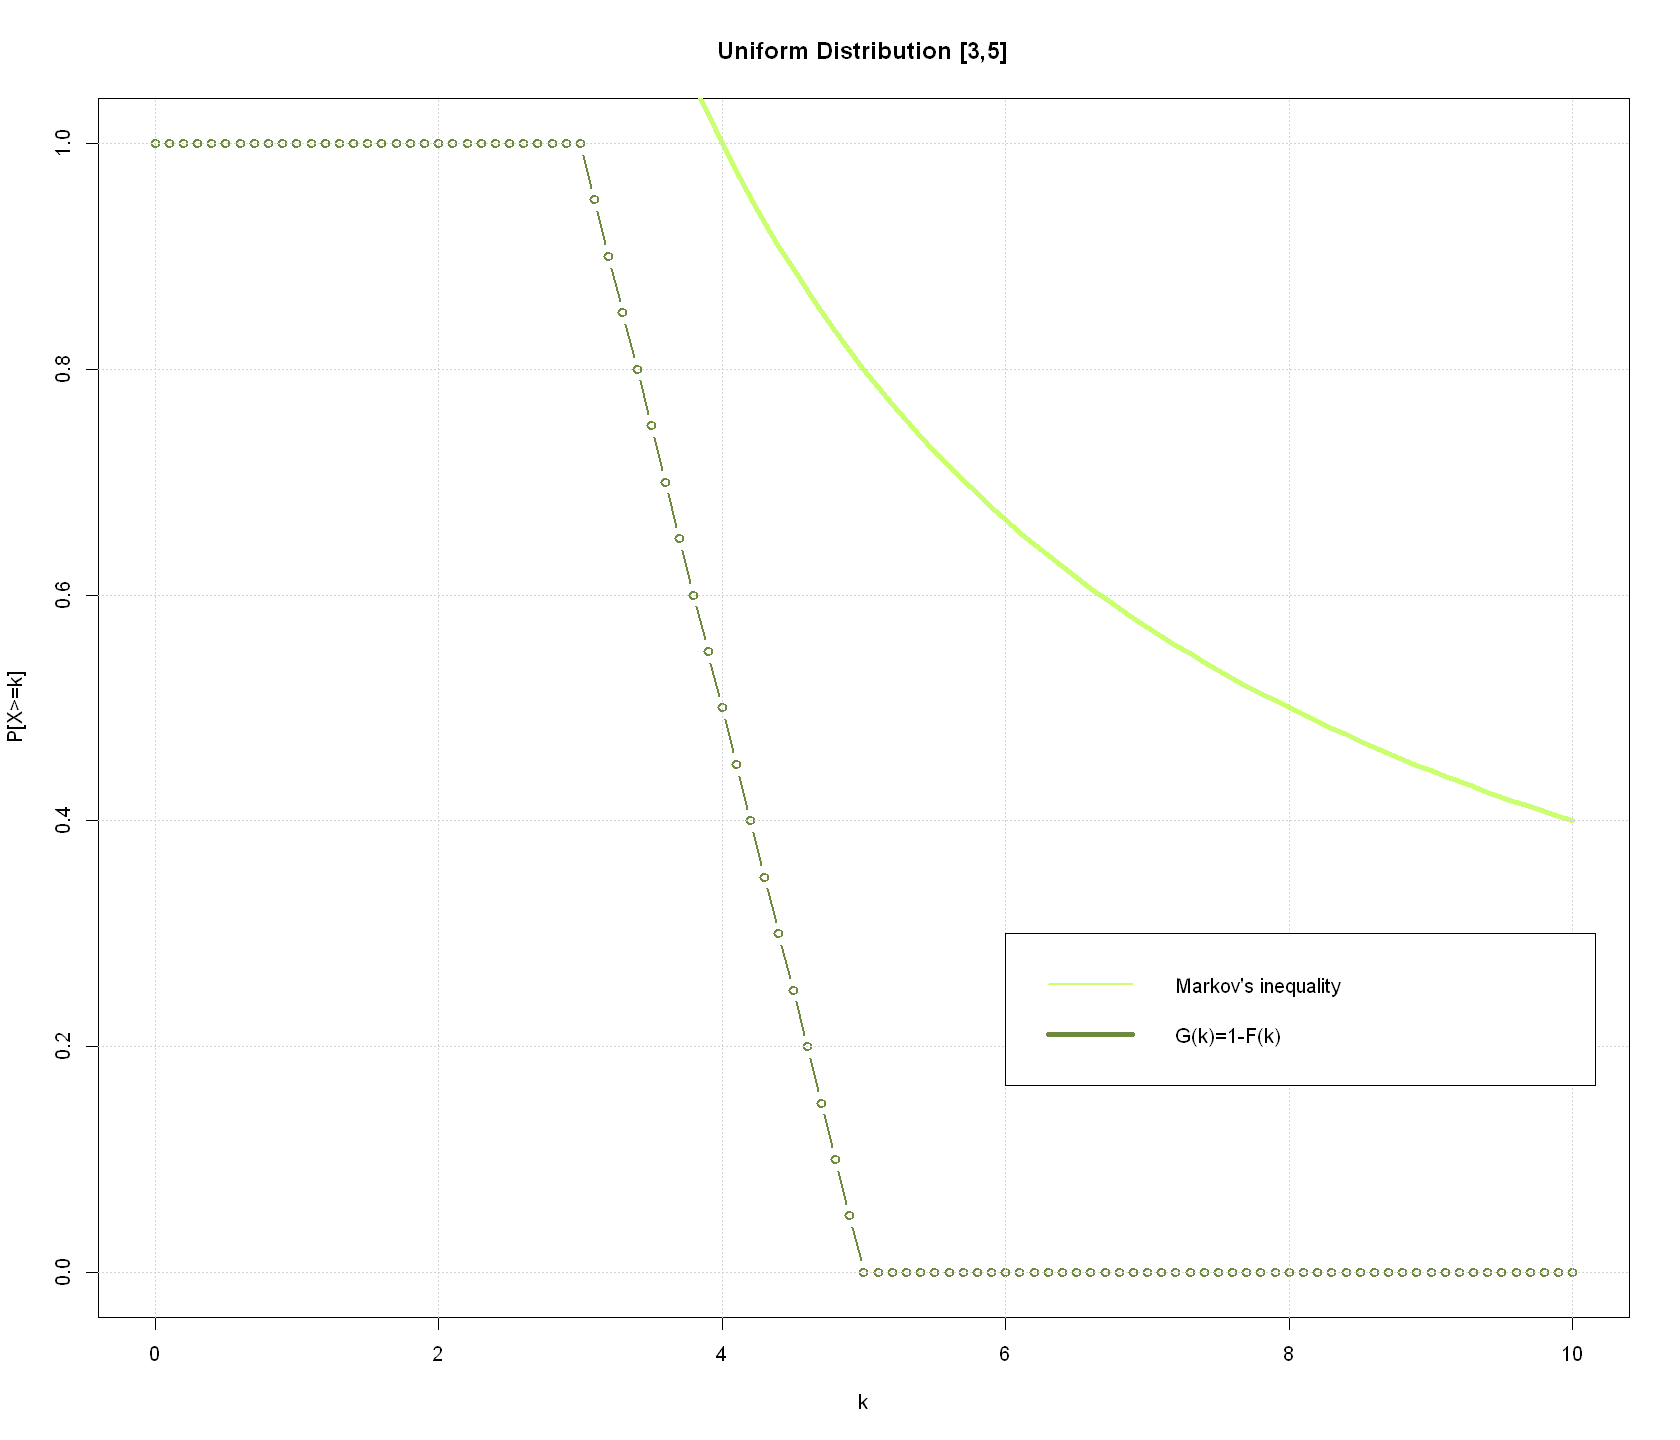

In [460]:
M_uni<-function(k){
    return(4/k)
}
G_uni<-function(k){
    return(1-punif(k,3,5))
}
k_range_uni<-seq(from=0,to=10,by=0.1) #for a better visualization
prob_uni<-seq(from=0,to=1,by=1/100)
plot(k_range_uni, prob_uni, type="n",xlab="k",ylab="P[X>=k]",main="Uniform Distribution [3,5]")
lines(k_range_uni, M_uni(k_range_uni),col="darkolivegreen1",lwd="4")
lines(k_range_uni, G_uni(k_range_uni),col="darkolivegreen4",lwd="2",type="b")
grid()
legend(6,0.3,legend=c("Markov's inequality","G(k)=1-F(k)"),lty=c(1,1),lwd=c(2,4),col=c("darkolivegreen1", "darkolivegreen4"))

c) Binomial Distribution

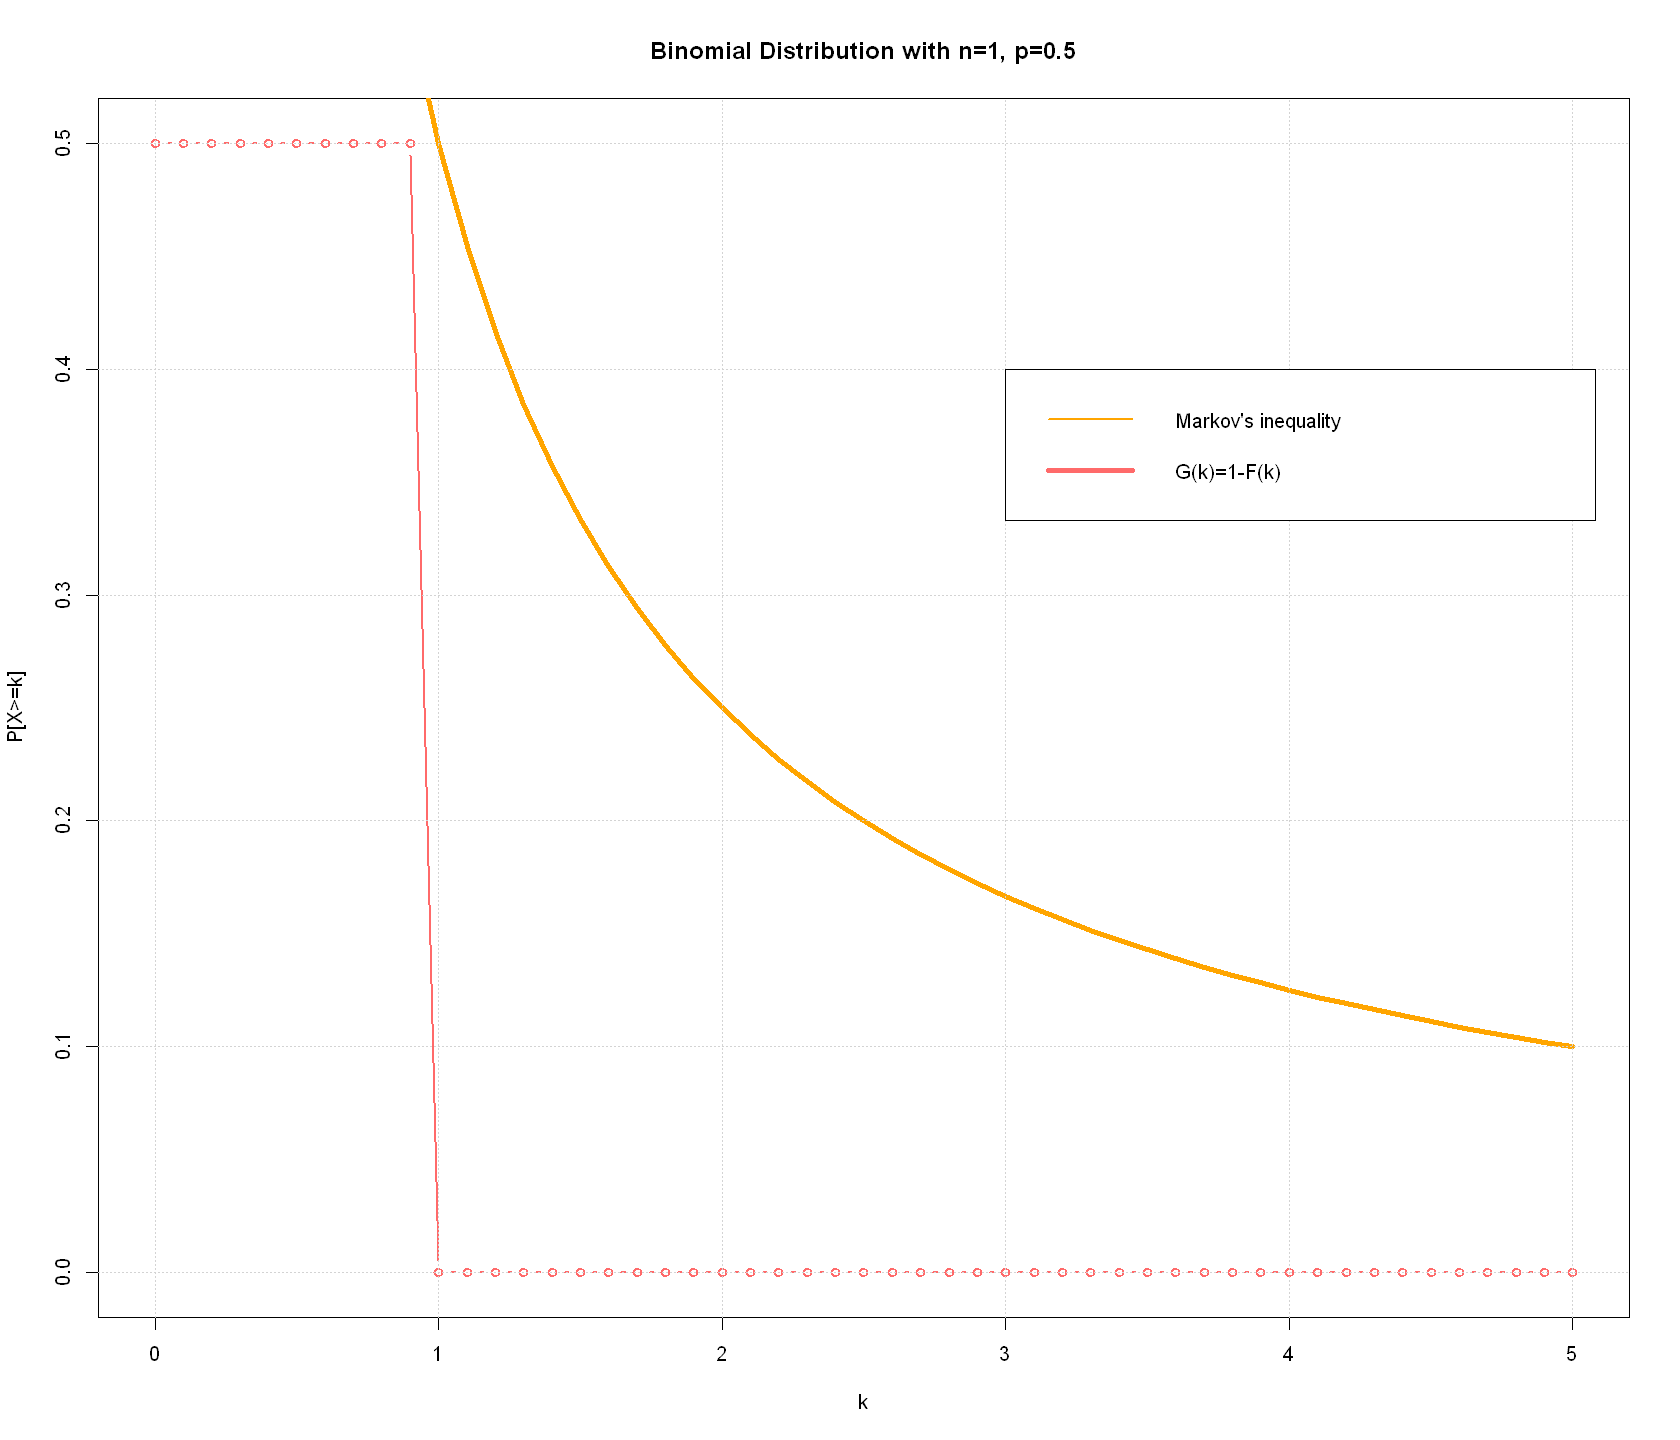

In [461]:
M_bin<-function(k){
    return(0.5/k)
}
G_bin<-function(k){
    return(1-pbinom(k,size=1,prob=0.5))
}
prob_bin<-seq(from=0,to=0.5,by=1/100) #for a better visualization
plot(k_range, prob_bin, type="n",xlab="k",ylab="P[X>=k]",main="Binomial Distribution with n=1, p=0.5")
lines(k_range, M_bin(k_range),col="orange",lwd="4")
lines(k_range, G_bin(k_range),col="indianred1",lwd="2",type="b")
grid()
legend(3,0.4,legend=c("Markov's inequality","G(k)=1-F(k)"),lty=c(1,1),lwd=c(2,4),col=c("orange", "indianred1"))

d) Poisson distribution

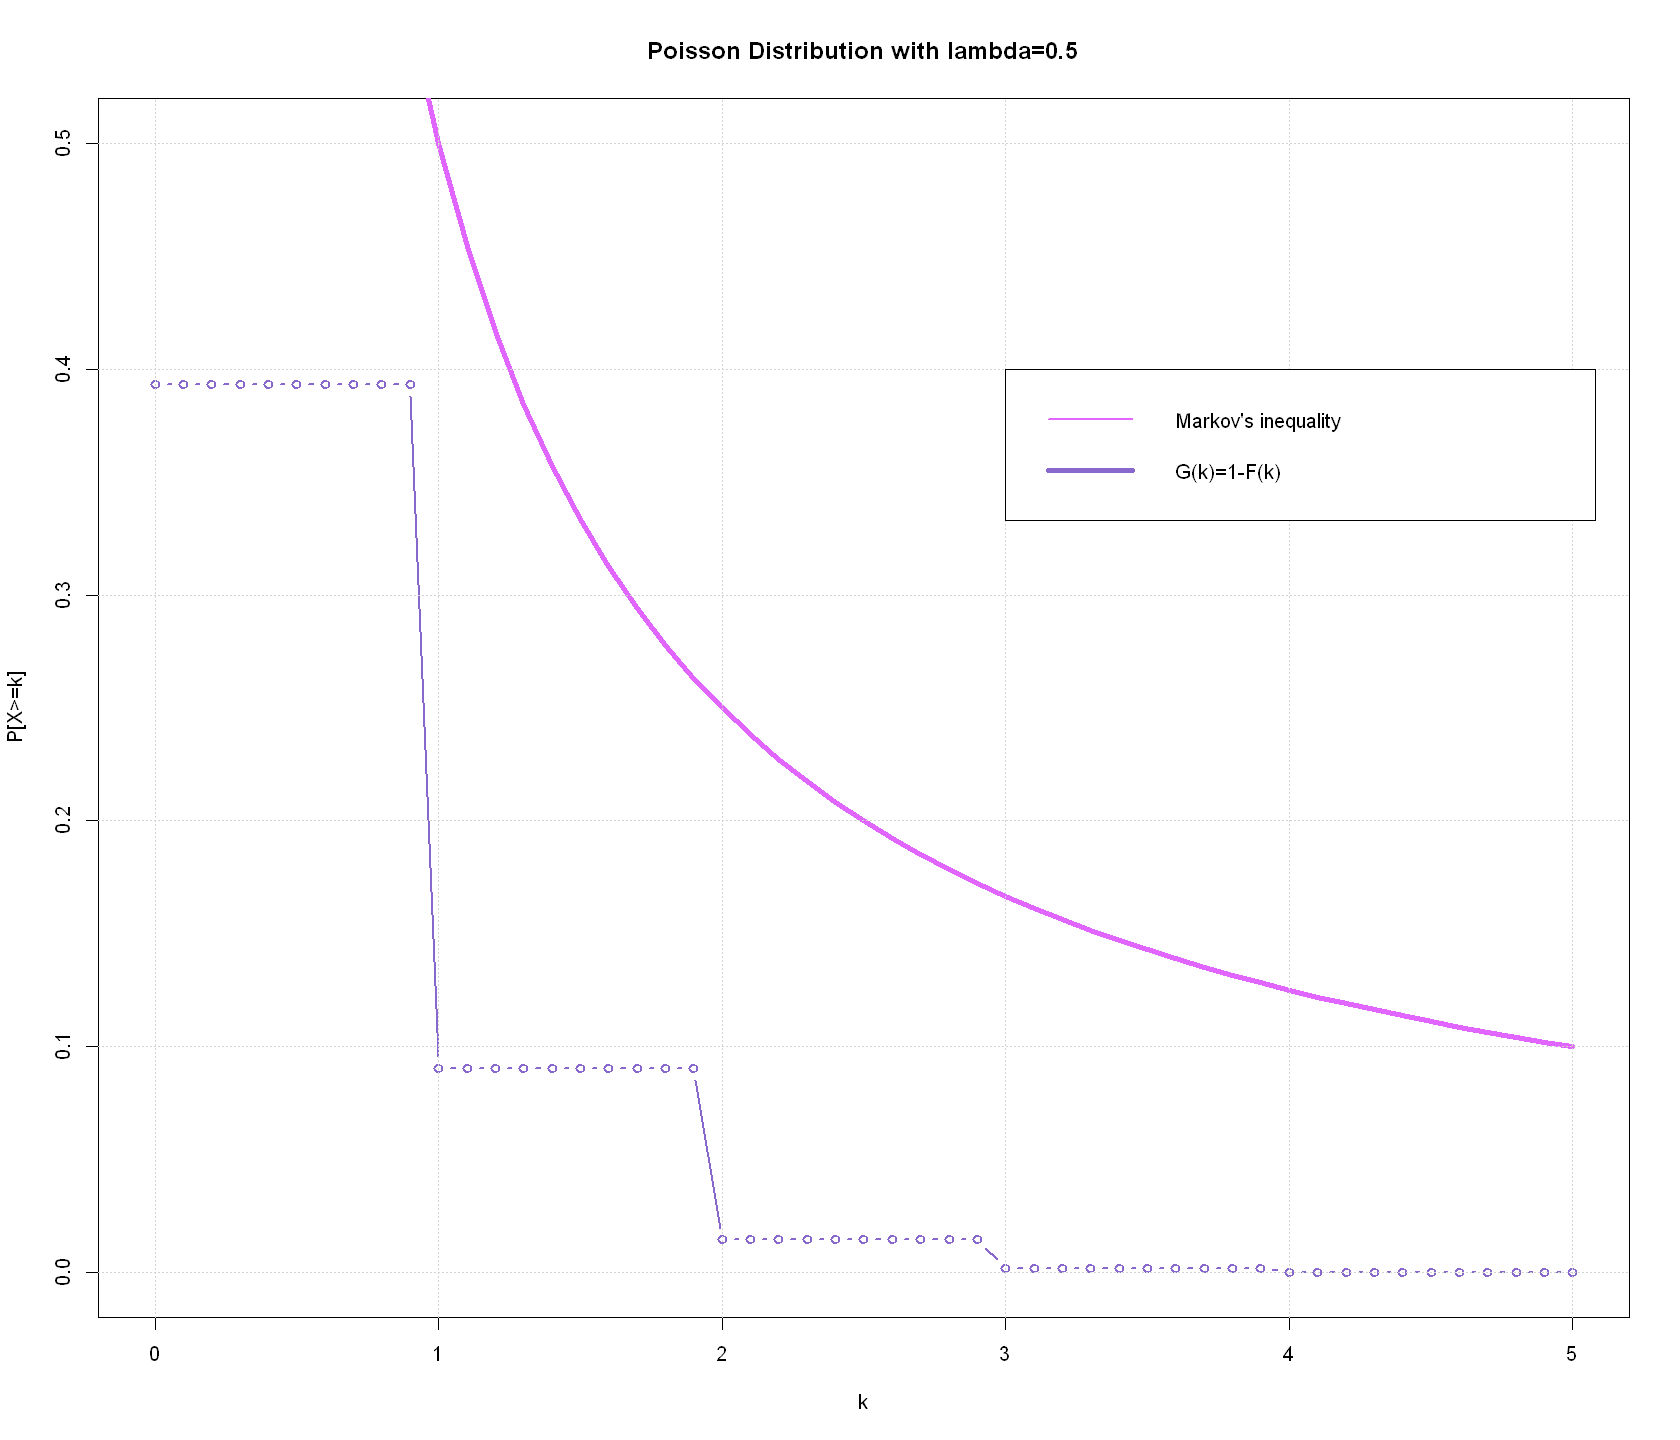

In [462]:
M_p<-function(k){
    return(0.5/k)
}
G_p<-function(k){
    return(1-ppois(k,0.5))
}
plot(k_range, prob_bin, type="n",xlab="k",ylab="P[X>=k]",main="Poisson Distribution with lambda=0.5")
lines(k_range, M_p(k_range),col="mediumorchid1",lwd="4")
lines(k_range, G_p(k_range),col="mediumpurple3",lwd="2",type="b")
grid()
legend(3,0.4,legend=c("Markov's inequality","G(k)=1-F(k)"),lty=c(1,1),lwd=c(2,4),col=c("mediumorchid1", "mediumpurple3"))

## Exercise 3

a) Normal distribution

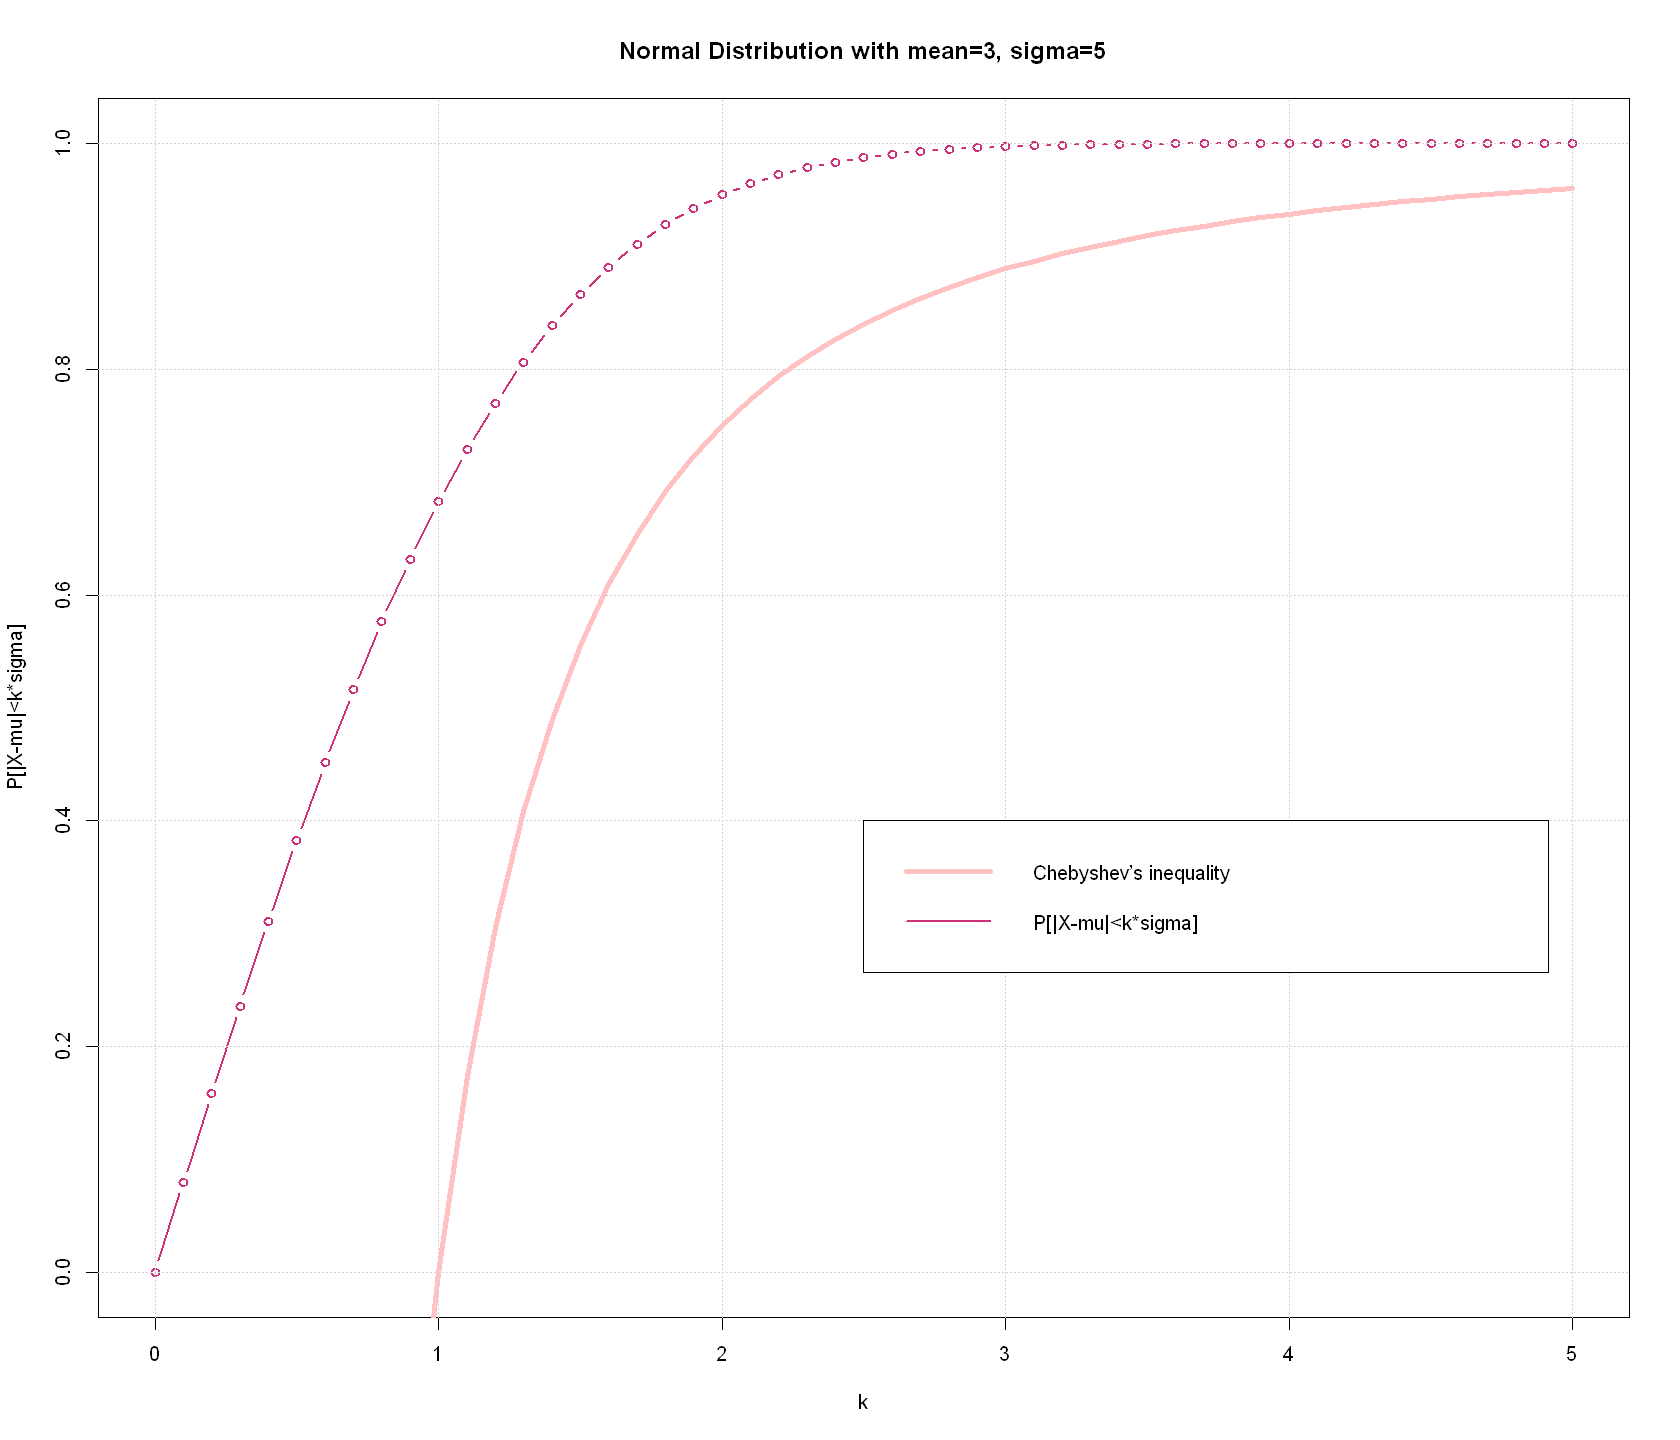

In [456]:
Cheb<-function(k){
    return(1-1/k^2)
}
F_norm<- function(k, mu, sigma){
            pnorm(3+k*5, 3, 5)-pnorm(3-k*5, 3, 5)
        }
k_range<-seq(from=0,to=5,by=0.1)
prob<-seq(from=0,to=1,by=1/50)
plot(k_range, prob,xlab="k",ylab="P[|X-mu|<k*sigma]",main="Normal Distribution with mean=3, sigma=5",type="n")
lines(k_range, Cheb(k_range), col="rosybrown1",lwd="4")
lines(k_range, F_norm(k_range),col="violetred3",lwd="2",type="b")
grid()
legend(2.5,0.4,legend=c("Chebyshev’s inequality","P[|X-mu|<k*sigma]"),lty=c(1,1),lwd=c(4,2),col=c("rosybrown1", "violetred3"))

b) Exponential distribution

Since $\lambda = 1$, $\sigma=\sqrt{\frac{1}{\lambda^2}}=1$

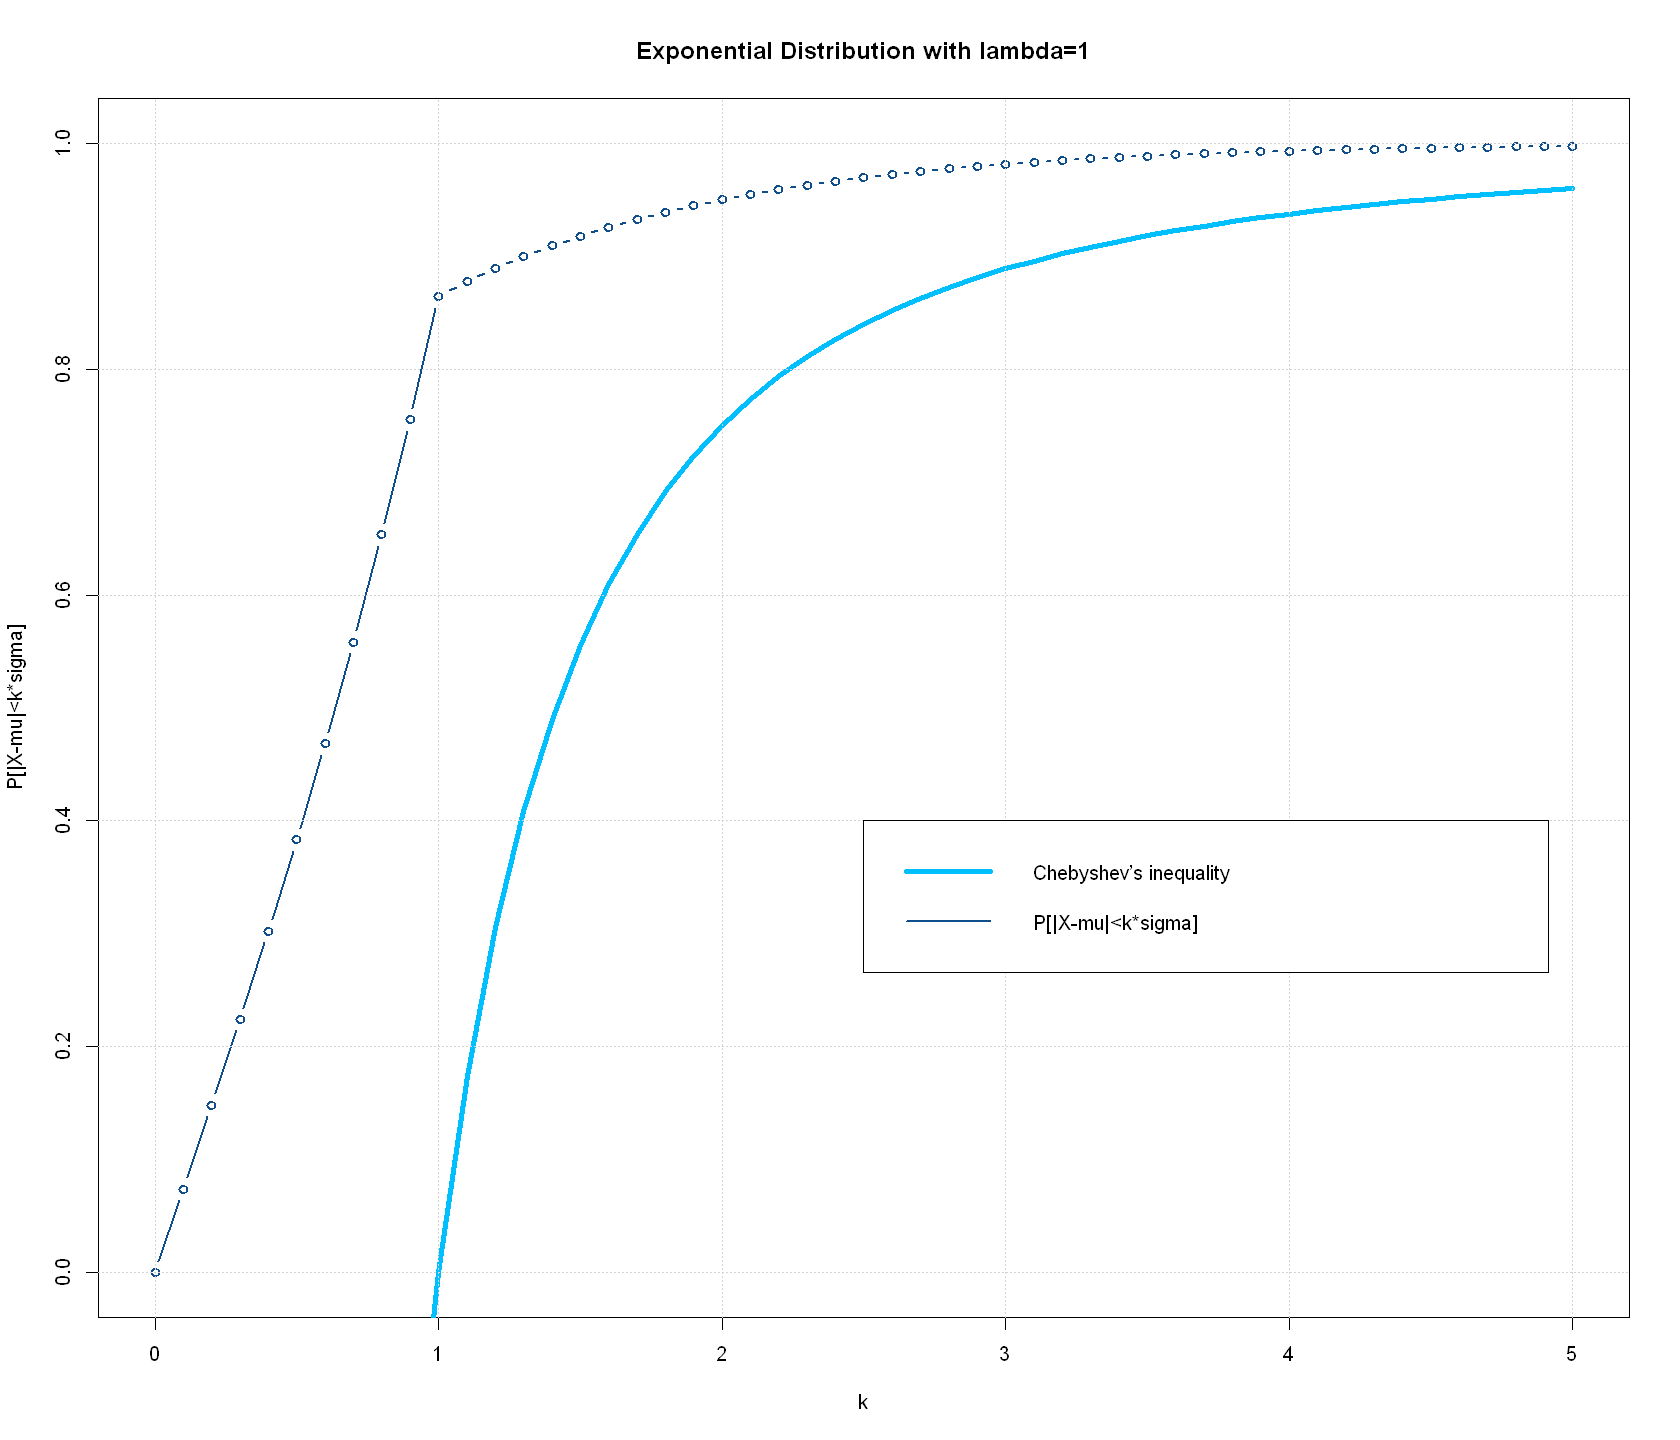

In [457]:
F_exp<- function(k, mu, sigma){
            pexp(1+k, 1)-pexp(1-k, 1)
        }
plot(k_range, prob,xlab="k",ylab="P[|X-mu|<k*sigma]",main="Exponential Distribution with lambda=1",type="n")
lines(k_range, Cheb(k_range), col="deepskyblue",lwd="4")
lines(k_range, F_exp(k_range),col="dodgerblue4",lwd="2",type="b")
grid()
legend(2.5,0.4,legend=c("Chebyshev’s inequality","P[|X-mu|<k*sigma]"),lty=c(1,1),lwd=c(4,2),col=c("deepskyblue", "dodgerblue4"))

c) Uniform Distribution

$$
\mu=\frac{a+b}{2}=1 \textit{   }\textit{   }\textit{therefore,}\textit{   }\textit{   }
\sigma=\sqrt{\frac{(b-a)^2}{12}}= \sqrt{\frac{2}{3}}
$$


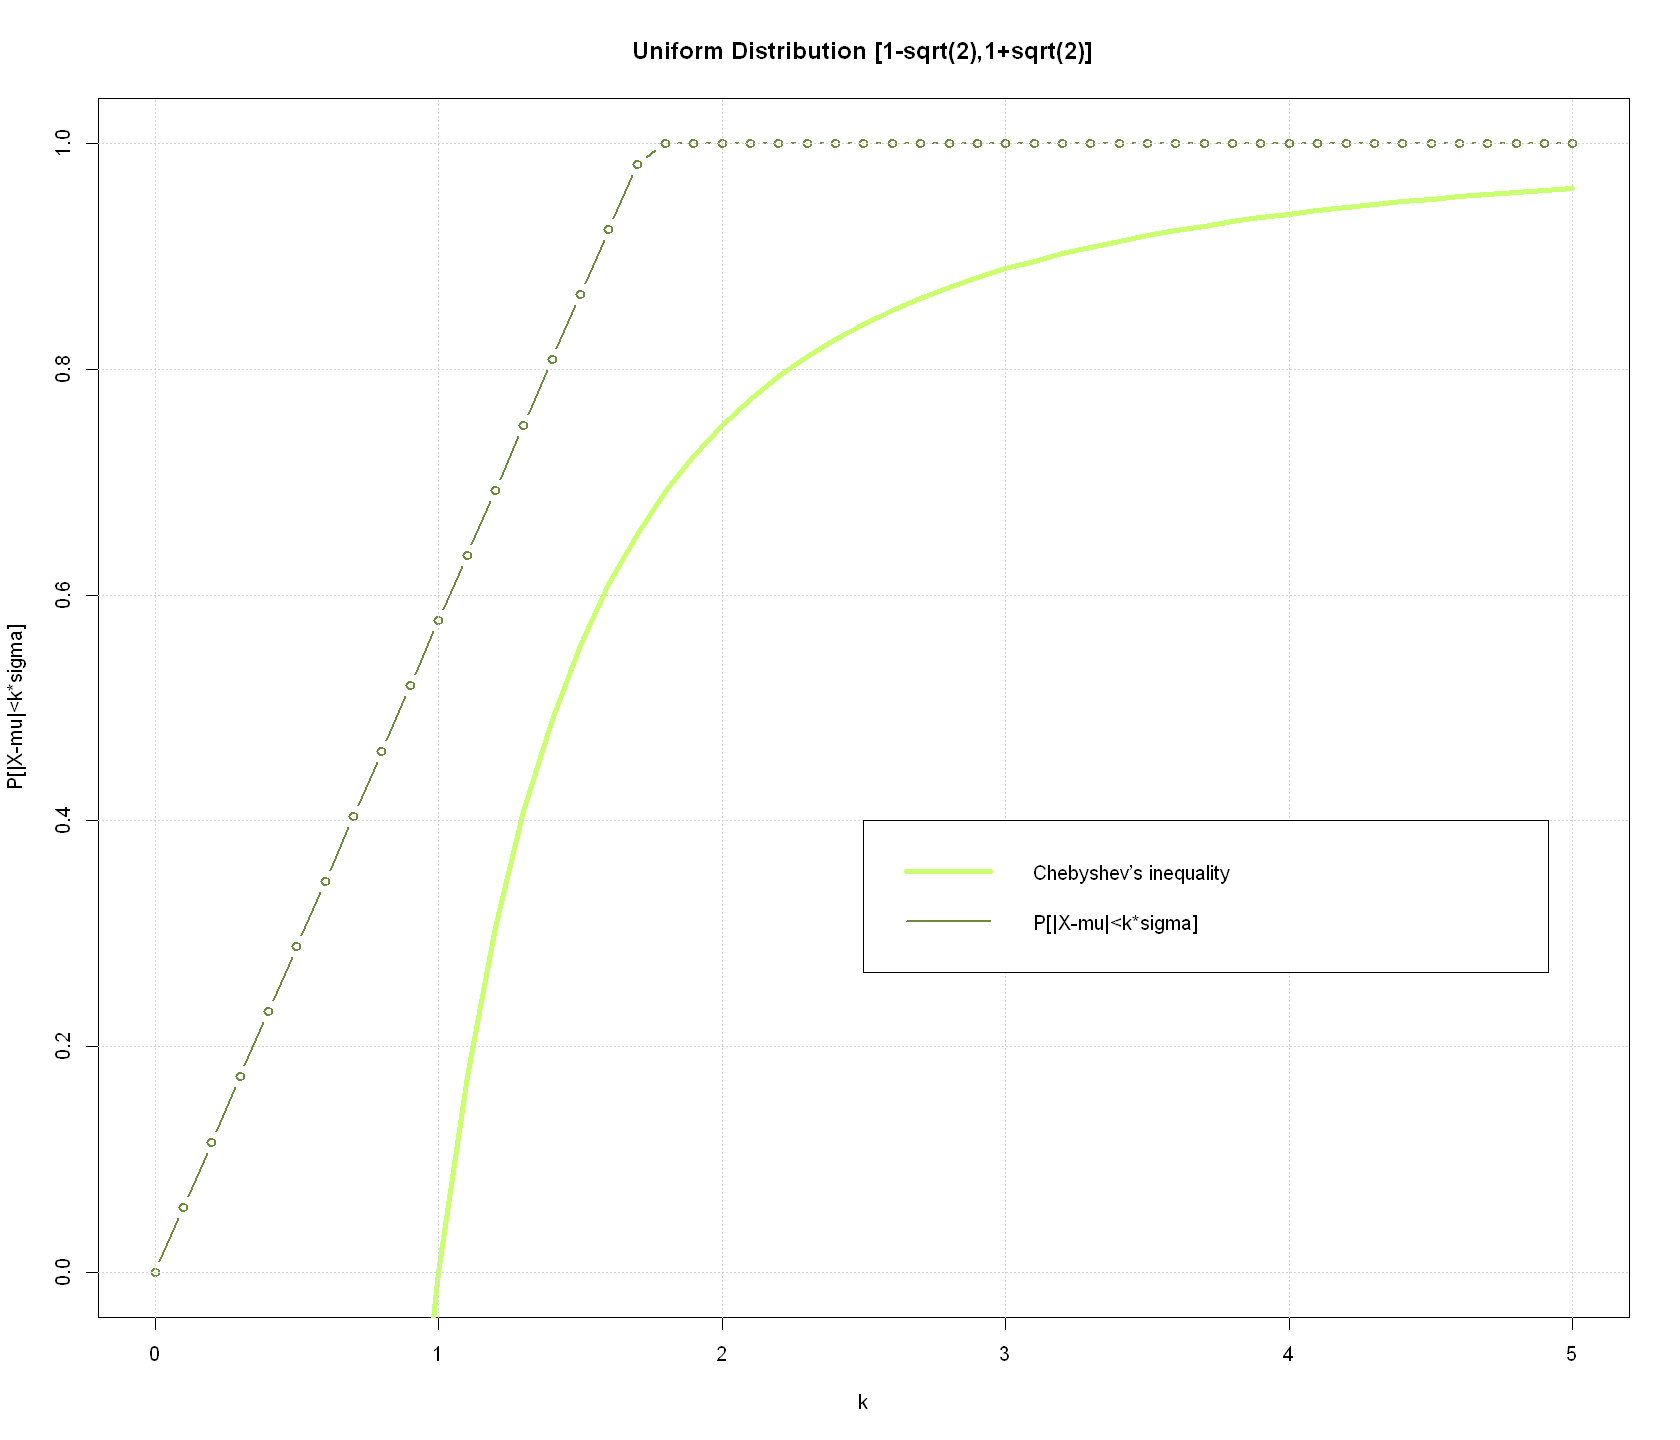

In [454]:
F_uni<- function(k, mu, sigma){
            punif(1+k*sqrt(2/3), 1-sqrt(2),1+sqrt(2))-punif(1-k*sqrt(2/3), 1-sqrt(2),1+sqrt(2))
        }
plot(k_range, prob,xlab="k",ylab="P[|X-mu|<k*sigma]",main="Uniform Distribution [1-sqrt(2),1+sqrt(2)]",type="n")
lines(k_range, Cheb(k_range), col="darkolivegreen1",lwd="4")
lines(k_range, F_uni(k_range),col="darkolivegreen4",lwd="2",type="b")
grid()
legend(2.5,0.4,legend=c("Chebyshev’s inequality","P[|X-mu|<k*sigma]"),lty=c(1,1),lwd=c(4,2),col=c("darkolivegreen1", "darkolivegreen4"))

d) Poisson distribution

Since $\lambda=\frac{1}{3}$:
$$
\sigma= \sqrt{\frac{1}{3}}
$$

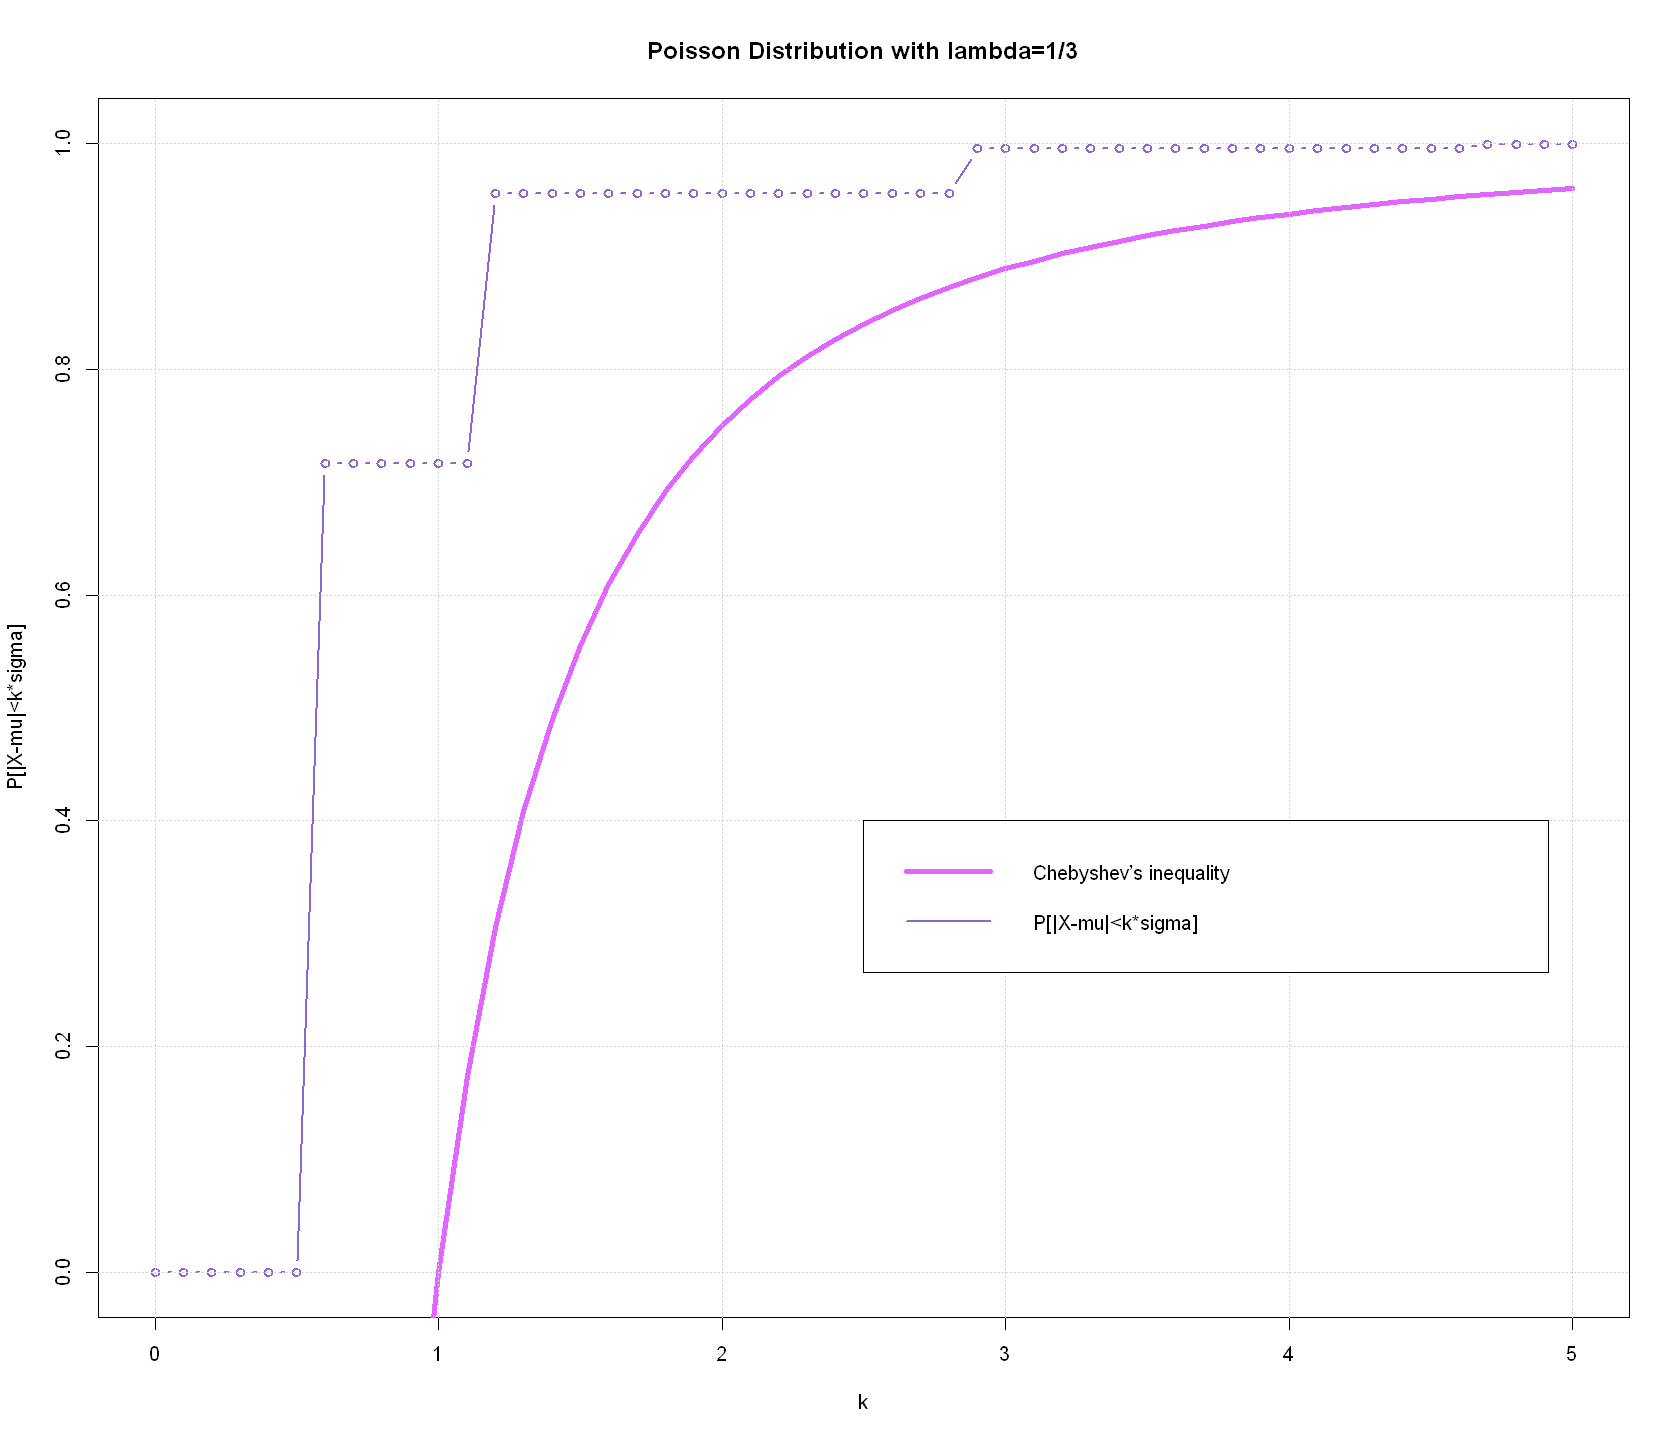

In [458]:
F_p<- function(k, mu, sigma){
            ppois(1/3+k*sqrt(1/3), 1/3)-ppois(1/3-k*sqrt(1/3), 1/3)
        }
plot(k_range, prob,xlab="k",ylab="P[|X-mu|<k*sigma]",main="Poisson Distribution with lambda=1/3",type="n")
lines(k_range, Cheb(k_range), col="mediumorchid1",lwd="4")
lines(k_range, F_p(k_range),col="mediumpurple3",lwd="2",type="b")
grid()
legend(2.5,0.4,legend=c("Chebyshev’s inequality","P[|X-mu|<k*sigma]"),lty=c(1,1),lwd=c(4,2),col=c("mediumorchid1", "mediumpurple3"))

## Exercise 4

In [424]:
n<-14 #number of trials
trials<-seq(from=1,to=n,by=1)
#Now I define the two possibile probabilities of extracting a colored stone given Hj
p_w<-function(j){
    return(j/5)
    }
p_b<-function(j){
    return(1-j/5)
}
E_w<-0.5 #initial probability of extracting a white stone (this value will be use for the normalization)
E_b<-0.5
H<-c(1/6,1/6,1/6,1/6,1/6,1/6) #collection of all the initial H_j probabilities
H_all<-matrix(,nrow=length(trials),ncol=6) #I create a matrix to collect all the H_j values
for (j in trials){
    cat("\nTrial",j,":")
    control<-FALSE
    while (control==FALSE){
        color <- readline(prompt="Enter the stone color (B/W): ") #The colors are inserted manually
        if (color=="W" | color=="B"){
            control=TRUE
        } else {control=FALSE}
    }
    if (color=="W"){
        p_EH<-p_w
        E<-E_w
        cat("\nWhite is extracted") #control
    } else if (color=="B") {
        p_EH<-p_b
        E<-E_b
        cat("\nBlack is extracted") #control
    }
    cat("\nThe probability of each box is:")
    for (i in 1:6){
        H[i]=(H[i]*p_EH(i-1))/E #Updating the bayesian probability for each step
        cat("\nBox",i-1,":",round(H[i],digits=3))
        H_all[j,i]<-H[i]
    }
    add_w<-vector() #used to update the value of E_w
    for (i in 1:6){
        add_w[i]<-H[i]*p_w(i-1)
    }
    E_w=sum(add_w)
    add_b<-vector() #used to update the value of E_b
    for (i in 1:6){
        add_b[i]<-H[i]*p_b(i-1)
    }
    E_b=sum(add_b)
    cat("\nP(E_w|I) is:",round(E_w,digits=3))
    cat("\nP(E_b|I) is:",round(E_b,digits=3))
    cat("\n---------")
}
box.guess<-which(H_all==max(H_all[n,]),arr.ind=TRUE)
guess<-box.guess[1,2]-1
cat("\nThe guessed BOX is number:",guess)

Enter the stone color (B/W): B
Enter the stone color (B/W): B
Enter the stone color (B/W): B
Enter the stone color (B/W): B
Enter the stone color (B/W): B
Enter the stone color (B/W): B
Enter the stone color (B/W): B
Enter the stone color (B/W): B
Enter the stone color (B/W): B
Enter the stone color (B/W): B
Enter the stone color (B/W): B
Enter the stone color (B/W): B
Enter the stone color (B/W): B
Enter the stone color (B/W): W

Trial 1 :
Black is extracted
The probability of each box is:
Box 0 : 0.333
Box 1 : 0.267
Box 2 : 0.2
Box 3 : 0.133
Box 4 : 0.067
Box 5 : 0
P(E_w|I) is: 0.267
P(E_b|I) is: 0.733
---------
Trial 2 :
Black is extracted
The probability of each box is:
Box 0 : 0.455
Box 1 : 0.291
Box 2 : 0.164
Box 3 : 0.073
Box 4 : 0.018
Box 5 : 0
P(E_w|I) is: 0.182
P(E_b|I) is: 0.818
---------
Trial 3 :
Black is extracted
The probability of each box is:
Box 0 : 0.556
Box 1 : 0.284
Box 2 : 0.12
Box 3 : 0.036
Box 4 : 0.004
Box 5 : 0
P(E_w|I) is: 0.13
P(E_b|I) is: 0.87
---------
Tri

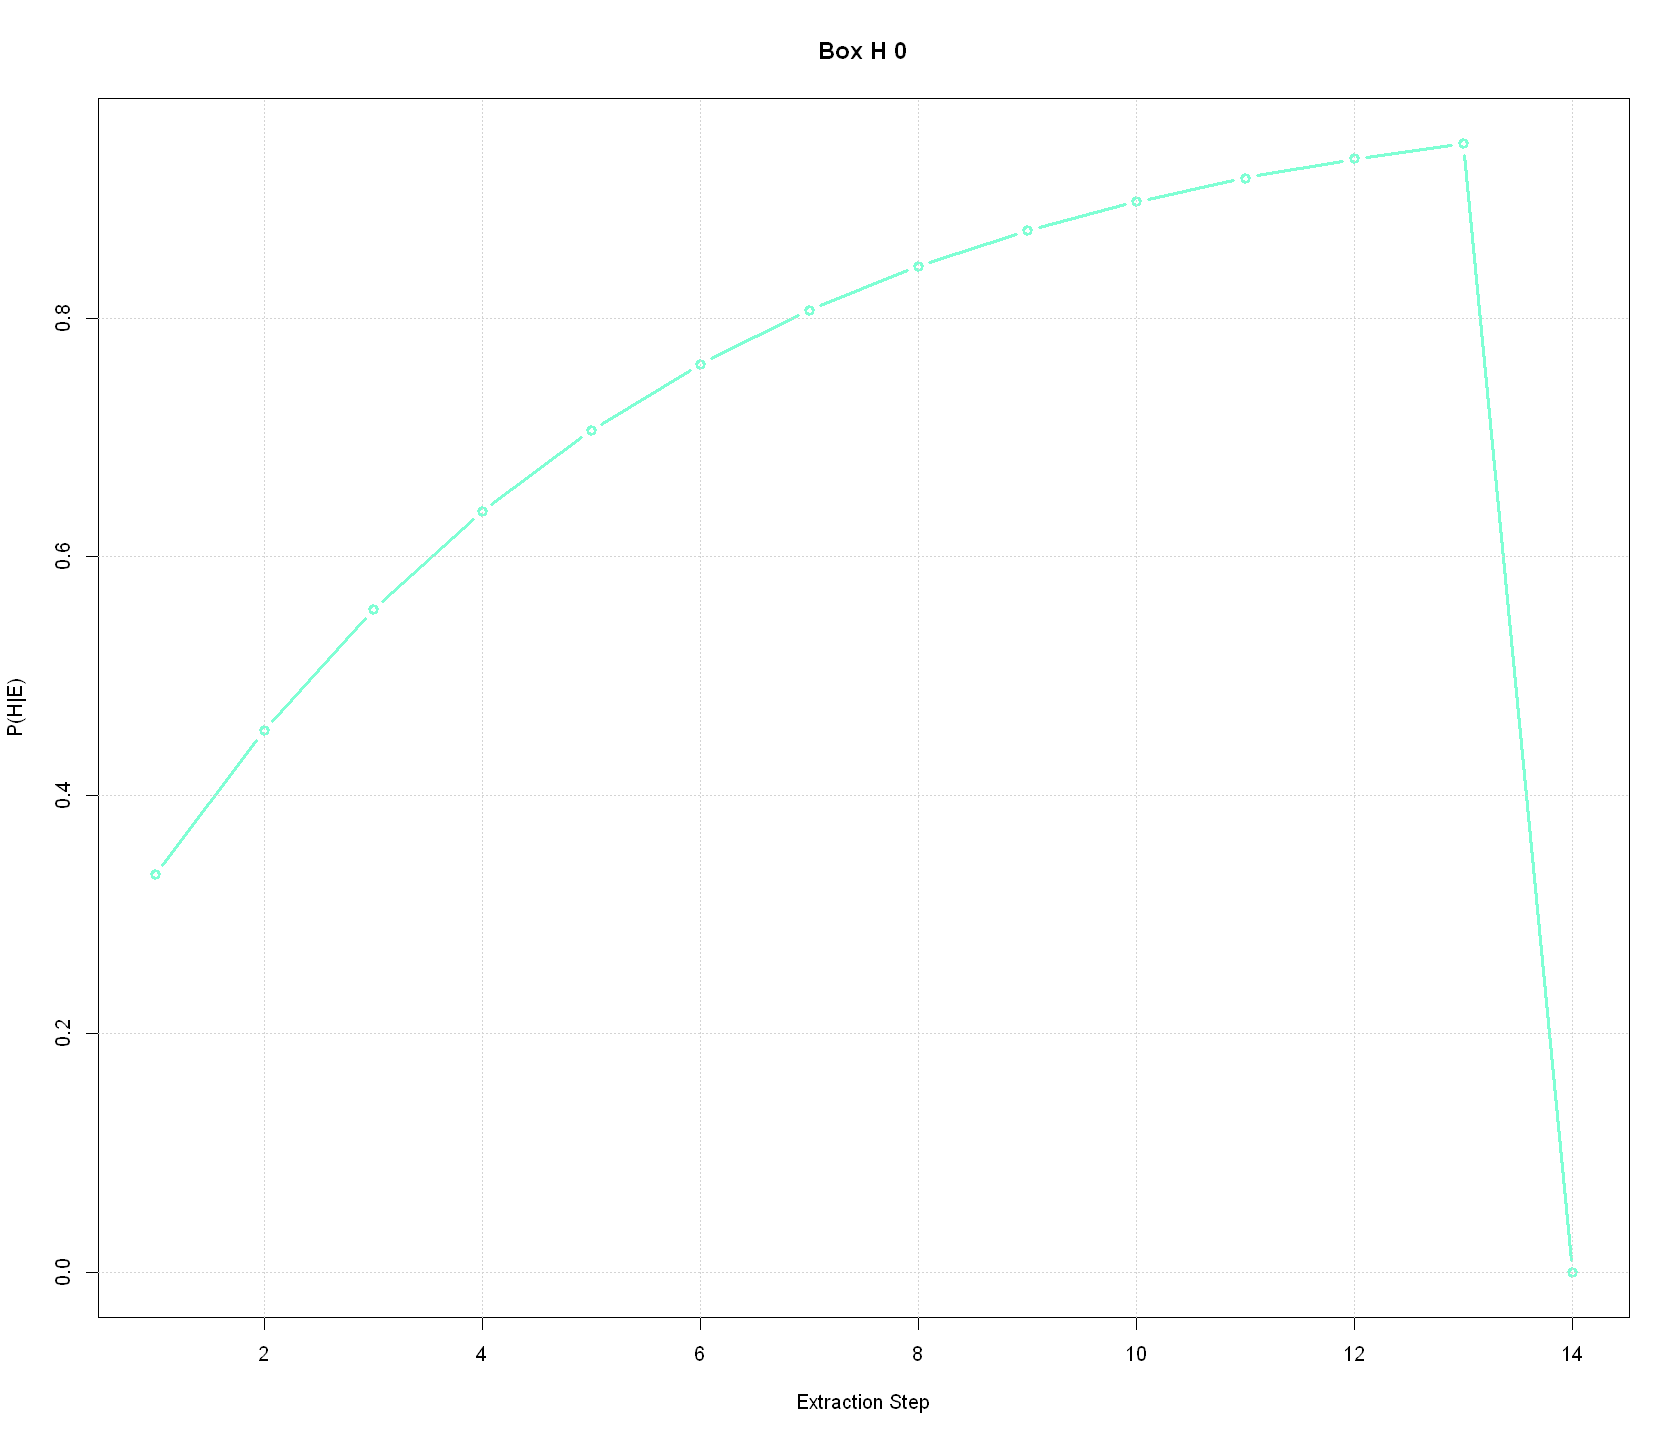

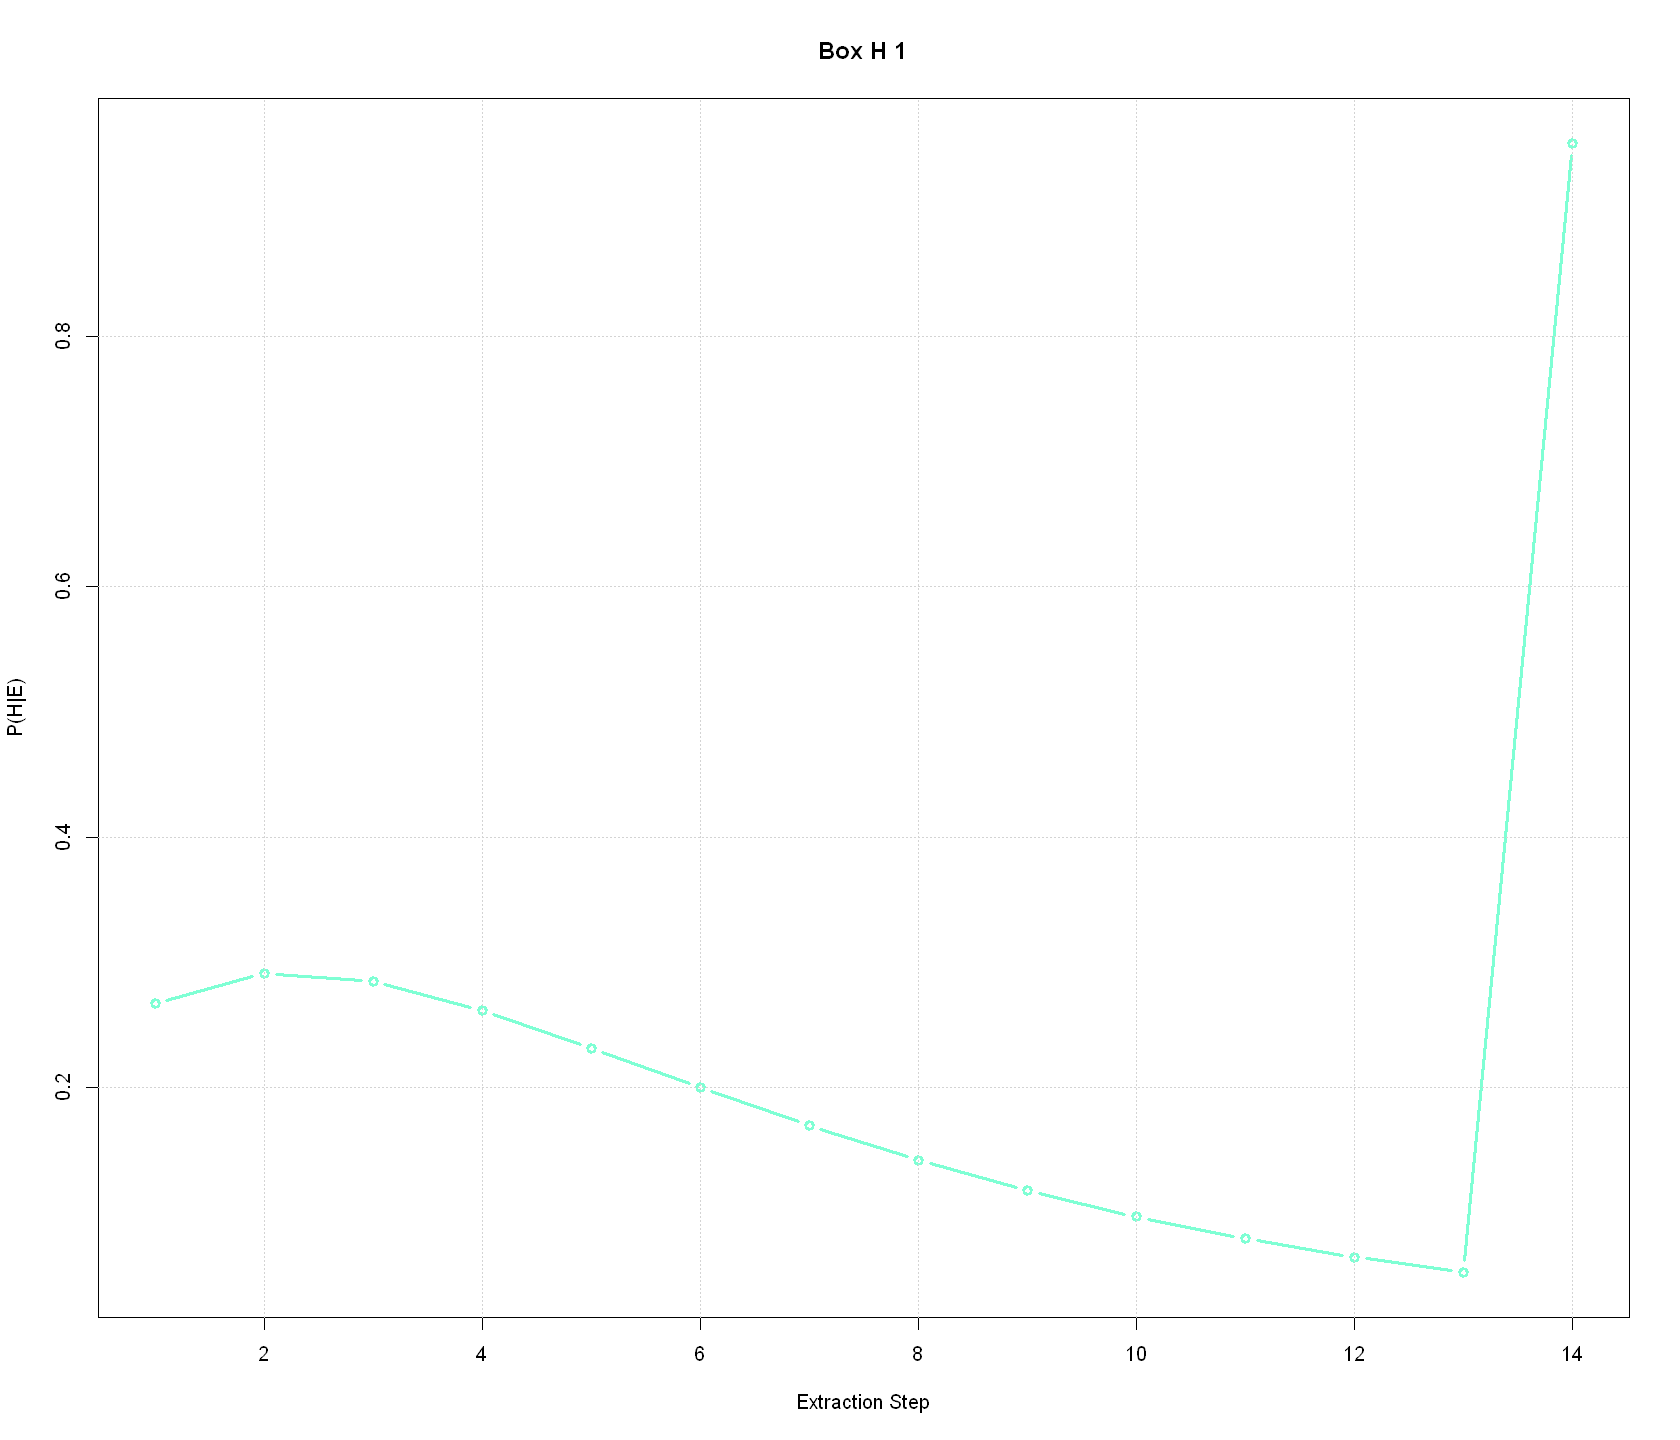

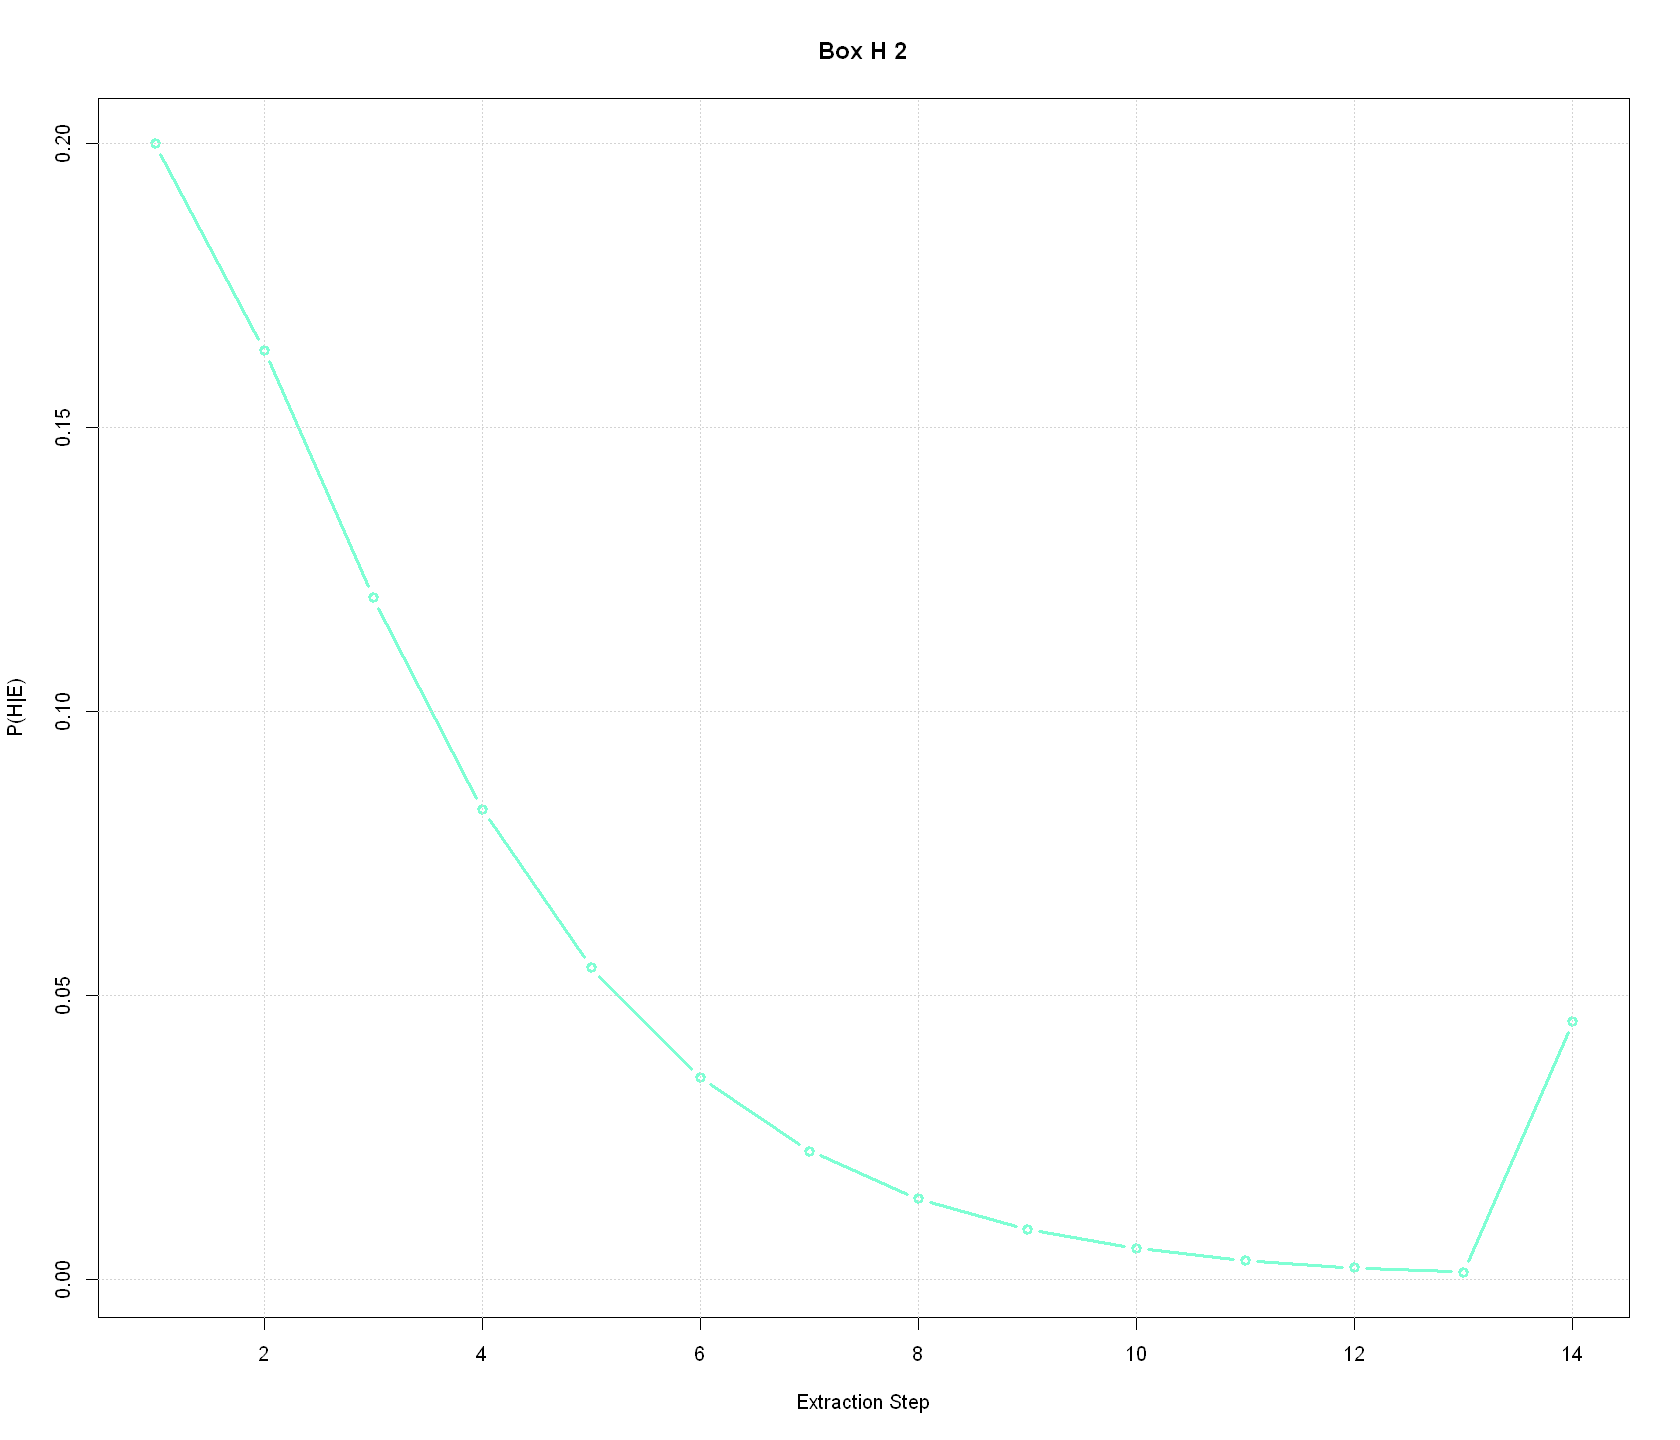

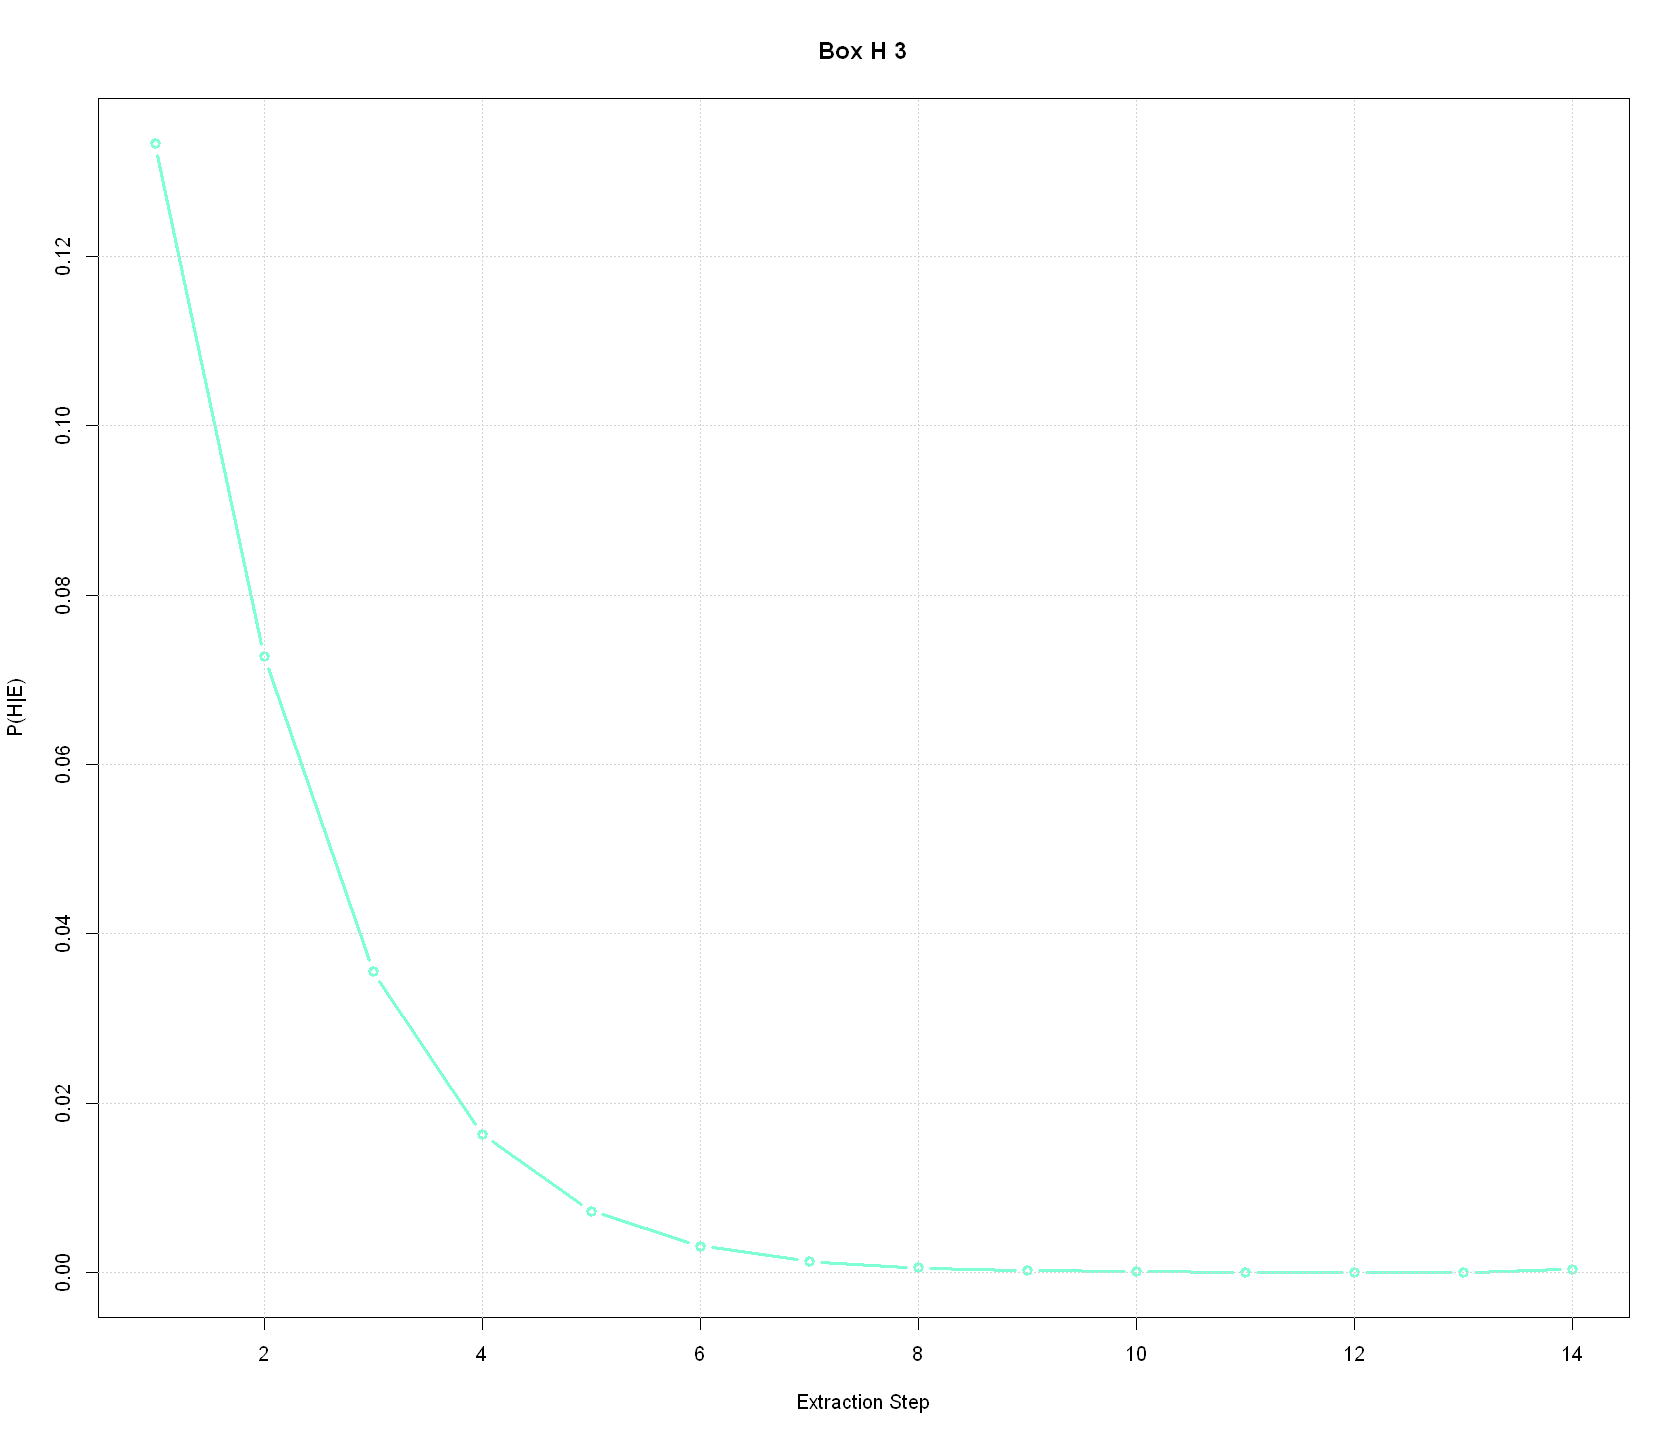

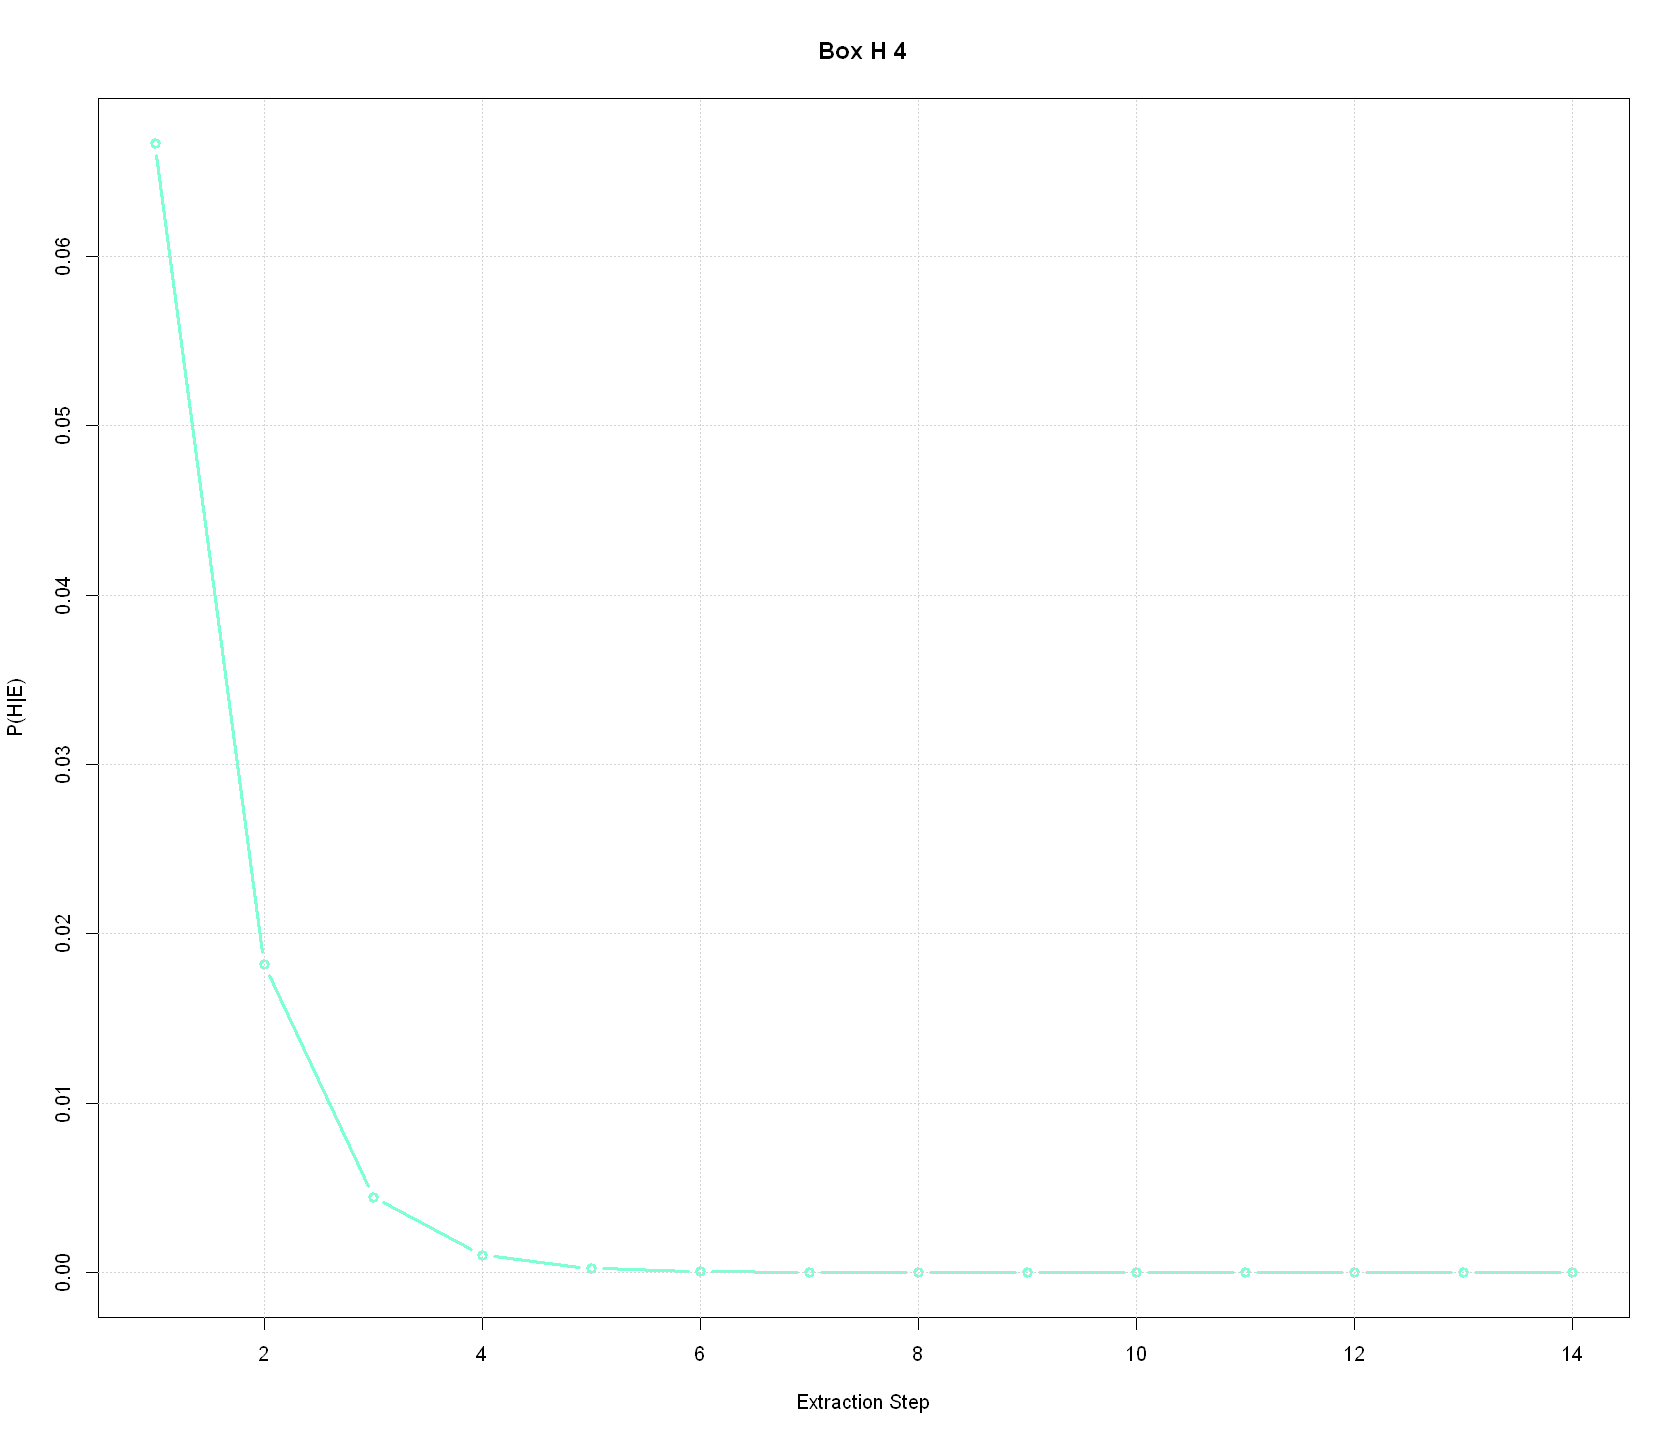

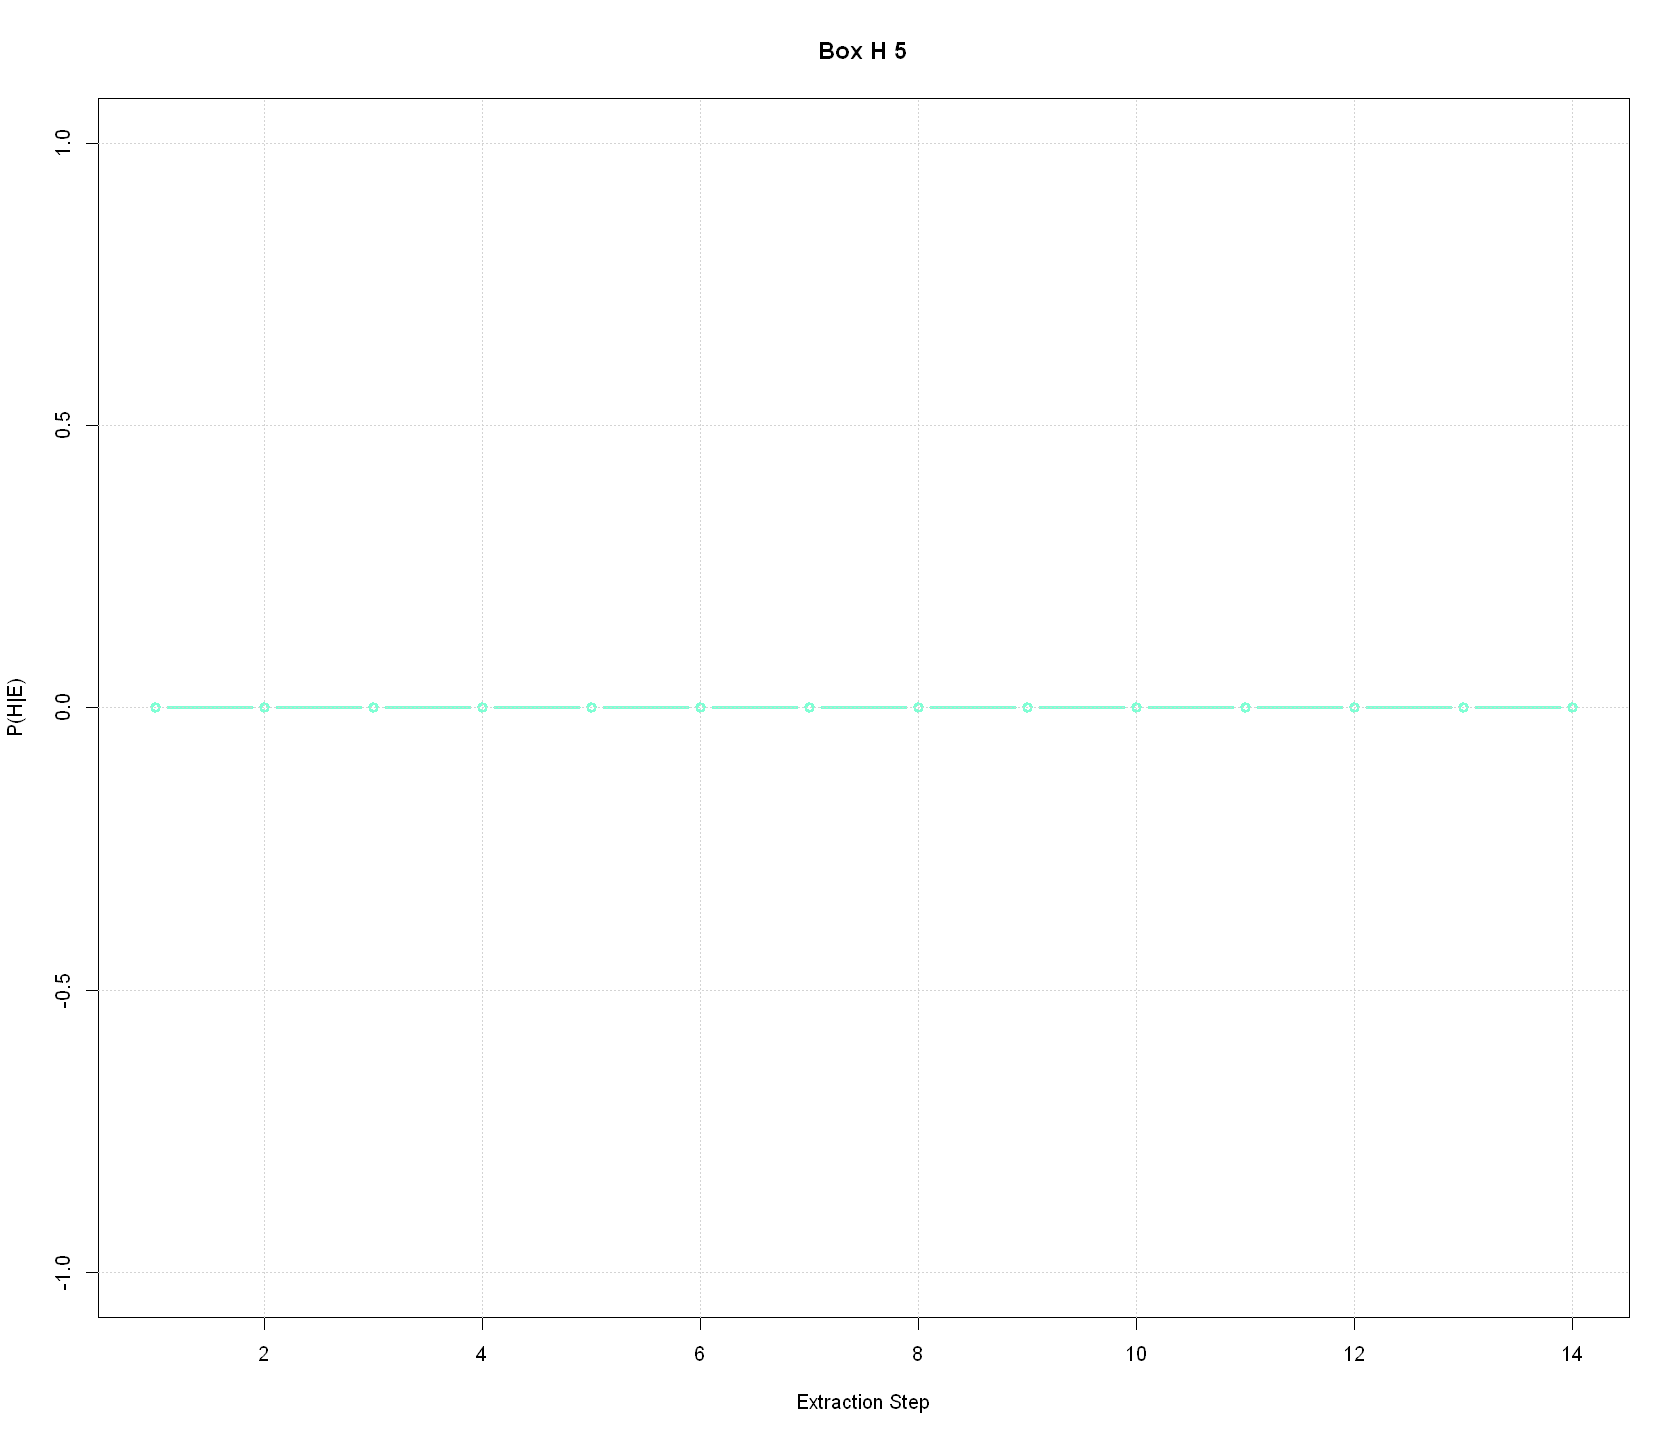

In [425]:
#PLOTS
for (p in 1:6){
    name=paste("Box H",p-1)
    plot(trials,H_all[,p],main=name,type="b",lwd="3",col="aquamarine",xlab="Extraction Step",ylab="P(H|E)")
    grid()
}

## Exercise 5

In [419]:
n<-20 #number of trials
num<-sample(0:5, 1) #It causally choose the number of the box
box<-rbinom(n,1,num/5) #generate samples from the chosen box
trials<-seq(from=1,to=n,by=1)
#Now I define the two possibile probabilities of extracting a colored stone given Hj
p_w<-function(j){
    return(j/5)
    }
p_b<-function(j){
    return(1-j/5)
}
E_w<-0.5 #initial probability of extracting a white stone (this value will be use for the normalization)
E_b<-0.5
H<-c(1/6,1/6,1/6,1/6,1/6,1/6) #collection of all the initial H_j probabilities
H_all<-matrix(,nrow=length(trials),ncol=6) #I create a matrix to collect all the H_j values
for (j in trials){
    cat("\nTrial",j,":")
    a<-box[j]
    if (a==1){
        color<-"W"
        p_EH<-p_w
        E<-E_w
        cat("\nWhite is extracted")
    } else if (a==0) {
        color<-"B"
        p_EH<-p_b
        E<-E_b
        cat("\nBlack is extracted")
    }
    cat("\nThe probability of each box is:")
    for (i in 1:6){
        H[i]=(H[i]*p_EH(i-1))/E #Updating the bayesian probability for each step
        cat("\nBox",i-1,":",round(H[i],digits=3))
        H_all[j,i]<-H[i]
    }
    add_w<-vector() #used to update the value of E_w
    for (i in 1:6){
        add_w[i]<-H[i]*p_w(i-1)
    }
    E_w=sum(add_w)
    add_b<-vector() #used to update the value of E_b
    for (i in 1:6){
        add_b[i]<-H[i]*p_b(i-1)
    }
    E_b=sum(add_b)
    cat("\nP(E_w|I) is:",round(E_w,digits=3))
    cat("\nP(E_b|I) is:",round(E_b,digits=3))
    cat("\n---------")
}
box.guess<-which(H_all==max(H_all[n,]),arr.ind=TRUE)
guess<-box.guess[1,2]-1
cat("\nThe guessed BOX is number:",guess)
cat("\nThe true BOX is number:",num) #this time we can check if our prediction is right
if(guess==num){
    cat("\nThe prediction is right.")
} else{
    cat("\nThe prediction is wrong.")
}


Trial 1 :
Black is extracted
The probability of each box is:
Box 0 : 0.333
Box 1 : 0.267
Box 2 : 0.2
Box 3 : 0.133
Box 4 : 0.067
Box 5 : 0
P(E_w|I) is: 0.267
P(E_b|I) is: 0.733
---------
Trial 2 :
Black is extracted
The probability of each box is:
Box 0 : 0.455
Box 1 : 0.291
Box 2 : 0.164
Box 3 : 0.073
Box 4 : 0.018
Box 5 : 0
P(E_w|I) is: 0.182
P(E_b|I) is: 0.818
---------
Trial 3 :
Black is extracted
The probability of each box is:
Box 0 : 0.556
Box 1 : 0.284
Box 2 : 0.12
Box 3 : 0.036
Box 4 : 0.004
Box 5 : 0
P(E_w|I) is: 0.13
P(E_b|I) is: 0.87
---------
Trial 4 :
Black is extracted
The probability of each box is:
Box 0 : 0.638
Box 1 : 0.261
Box 2 : 0.083
Box 3 : 0.016
Box 4 : 0.001
Box 5 : 0
P(E_w|I) is: 0.096
P(E_b|I) is: 0.904
---------
Trial 5 :
Black is extracted
The probability of each box is:
Box 0 : 0.706
Box 1 : 0.231
Box 2 : 0.055
Box 3 : 0.007
Box 4 : 0
Box 5 : 0
P(E_w|I) is: 0.073
P(E_b|I) is: 0.927
---------
Trial 6 :
White is extracted
The probability of each box is:
Bo

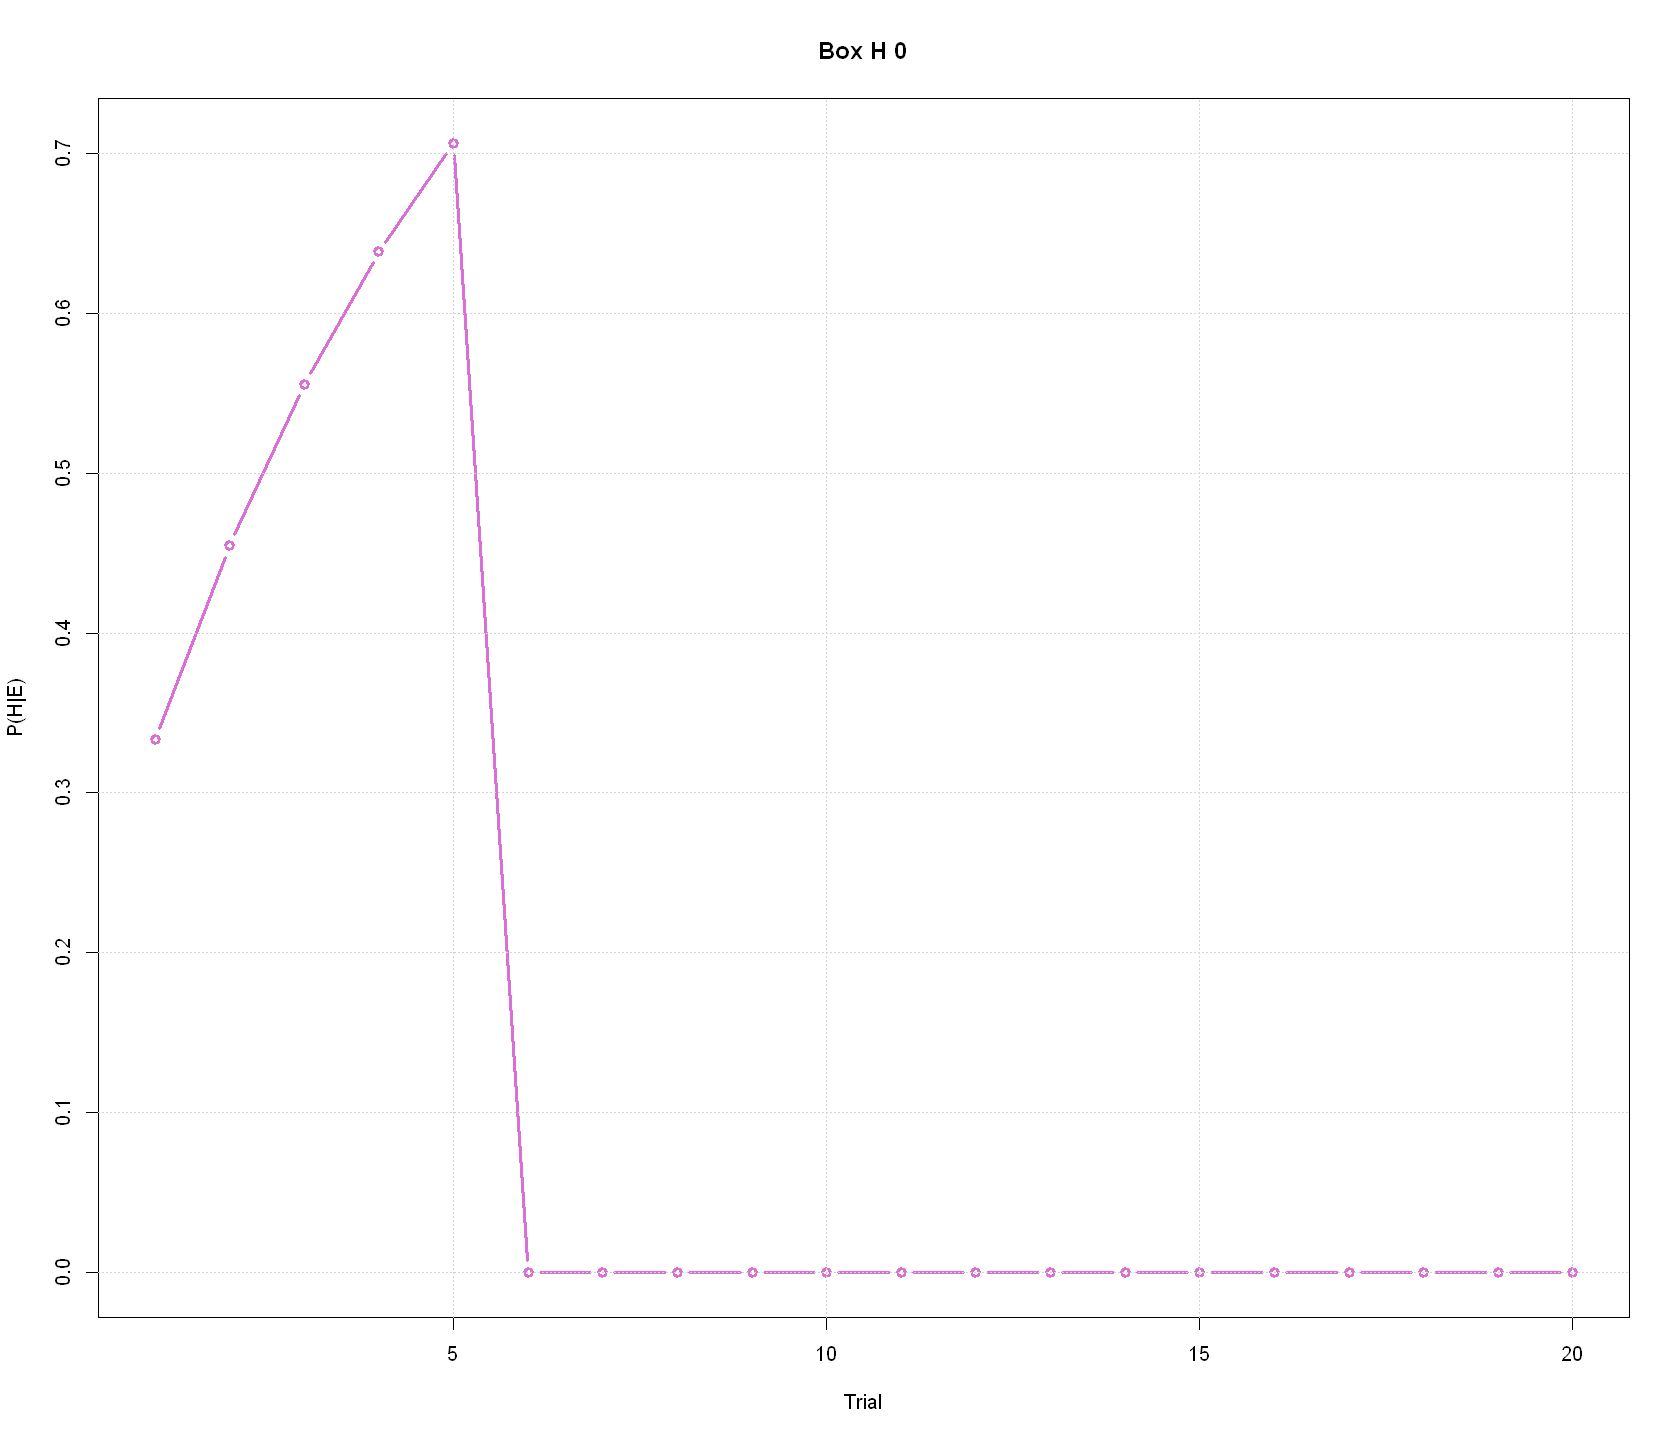

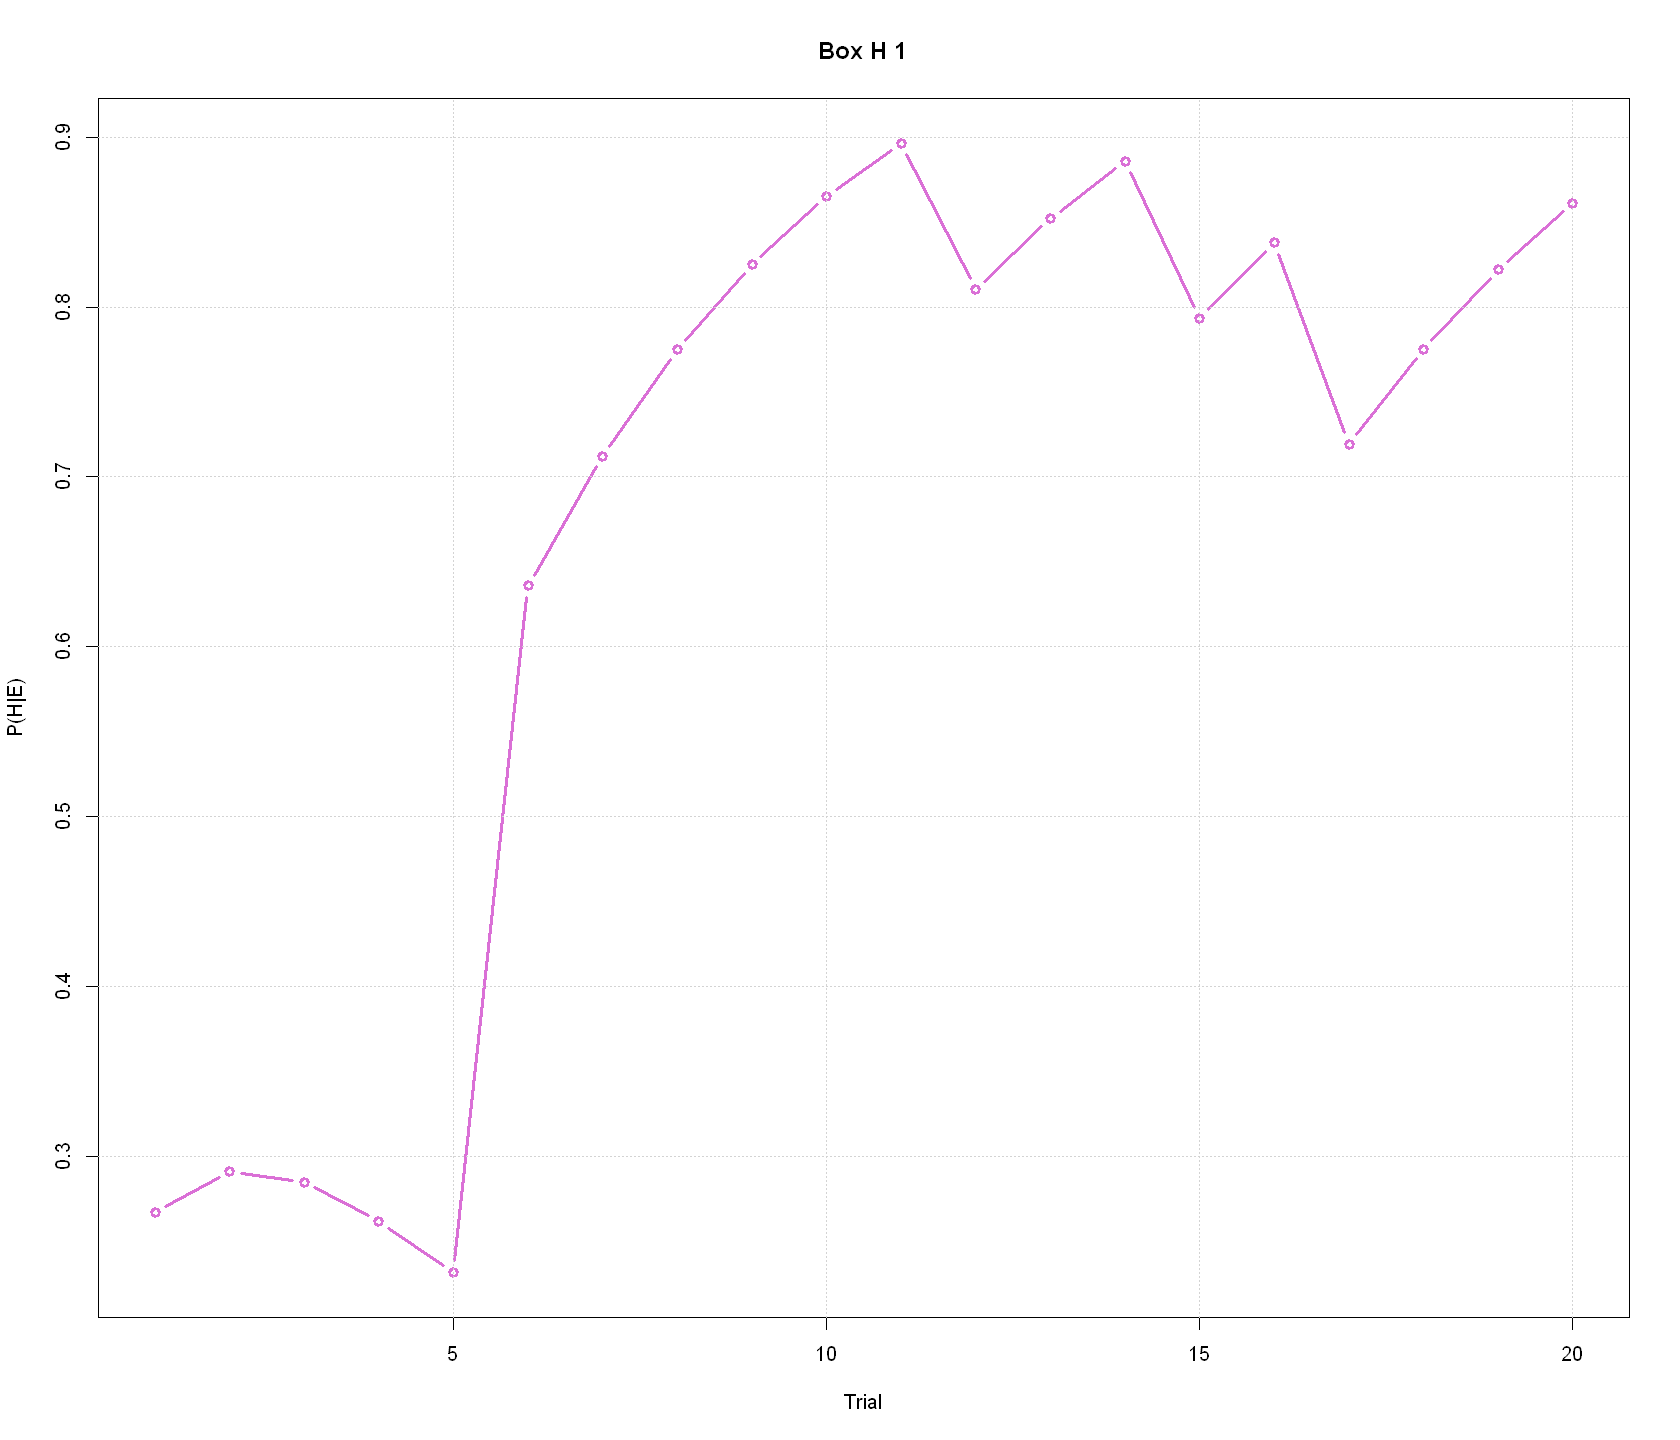

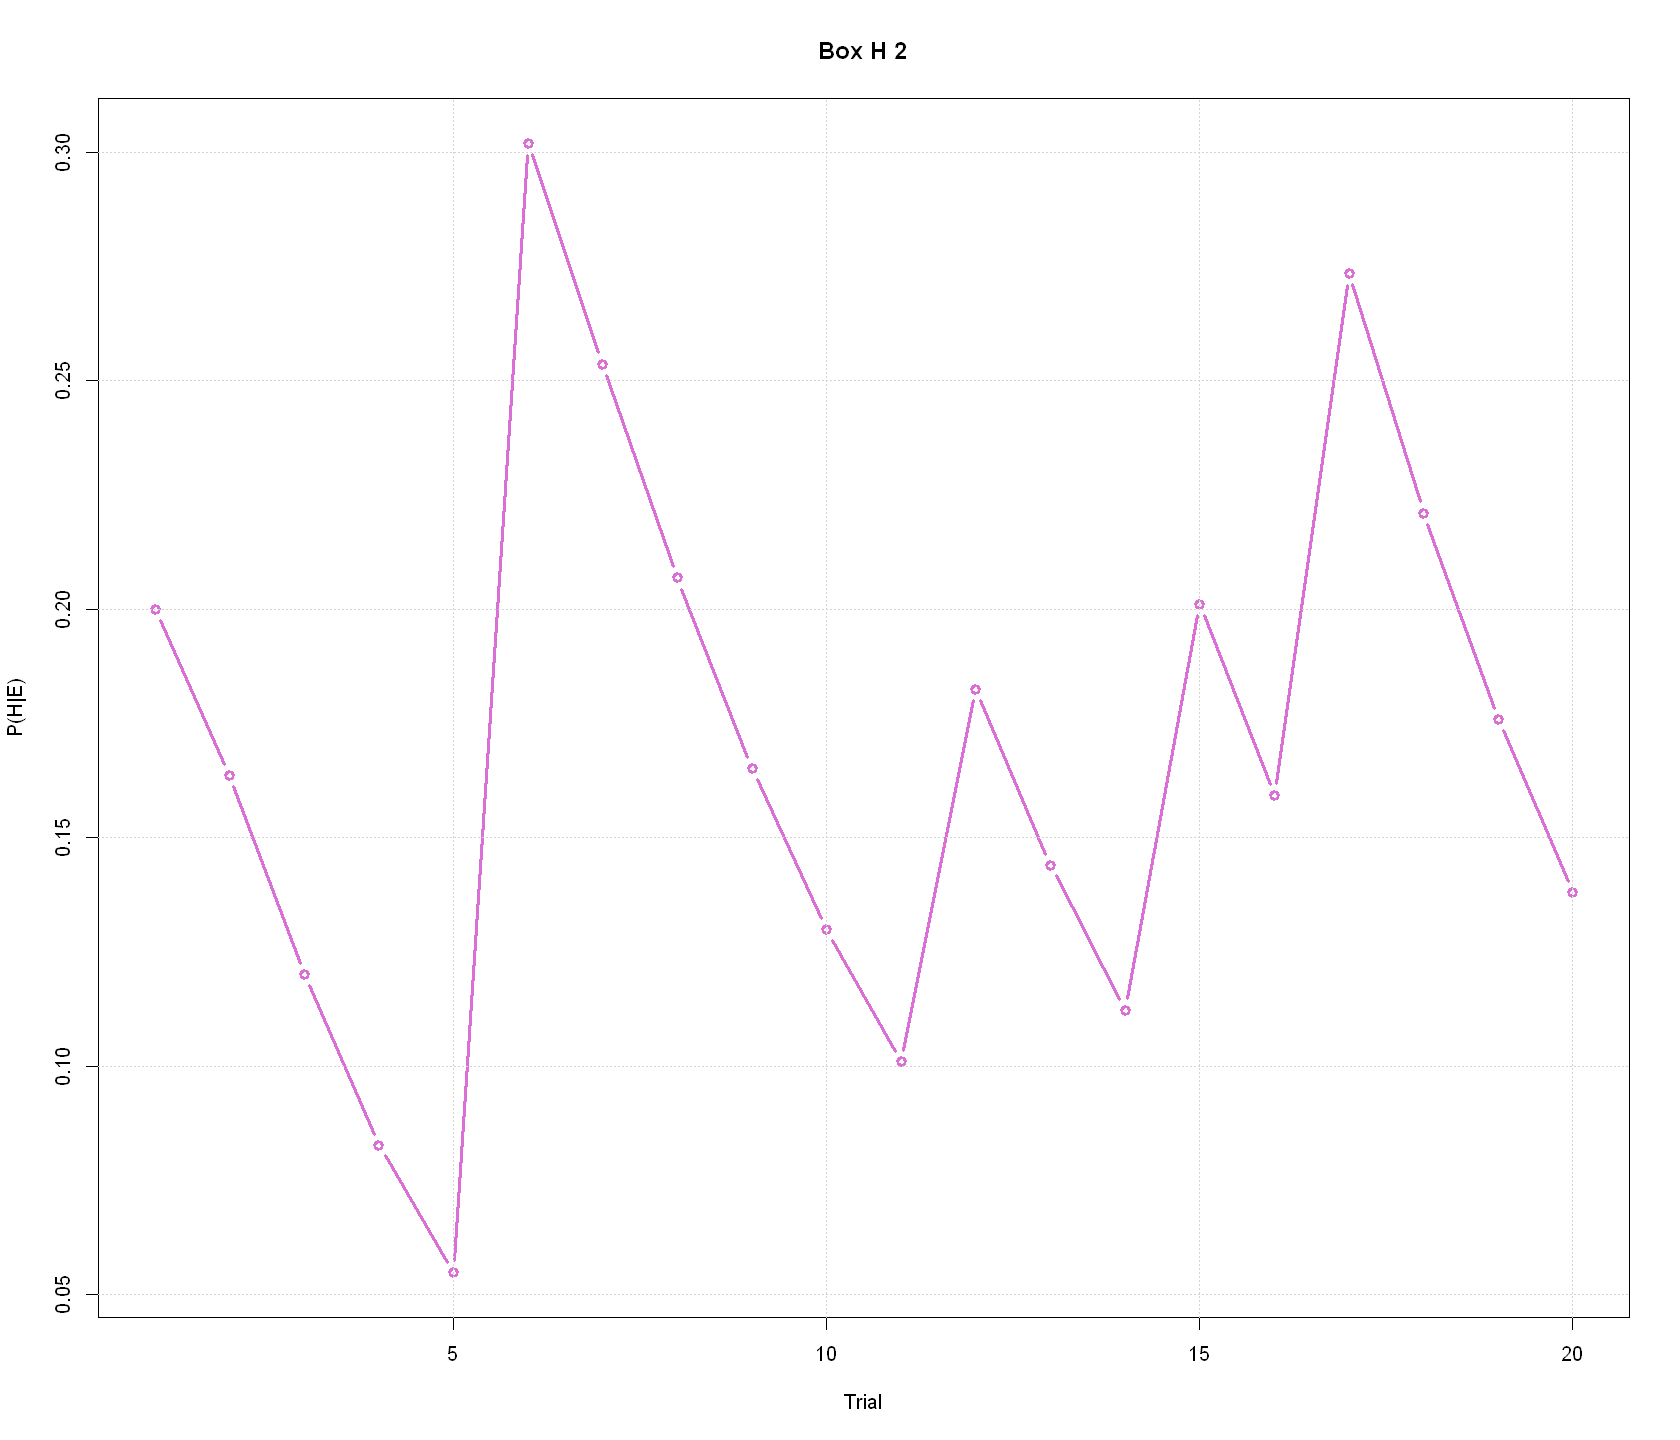

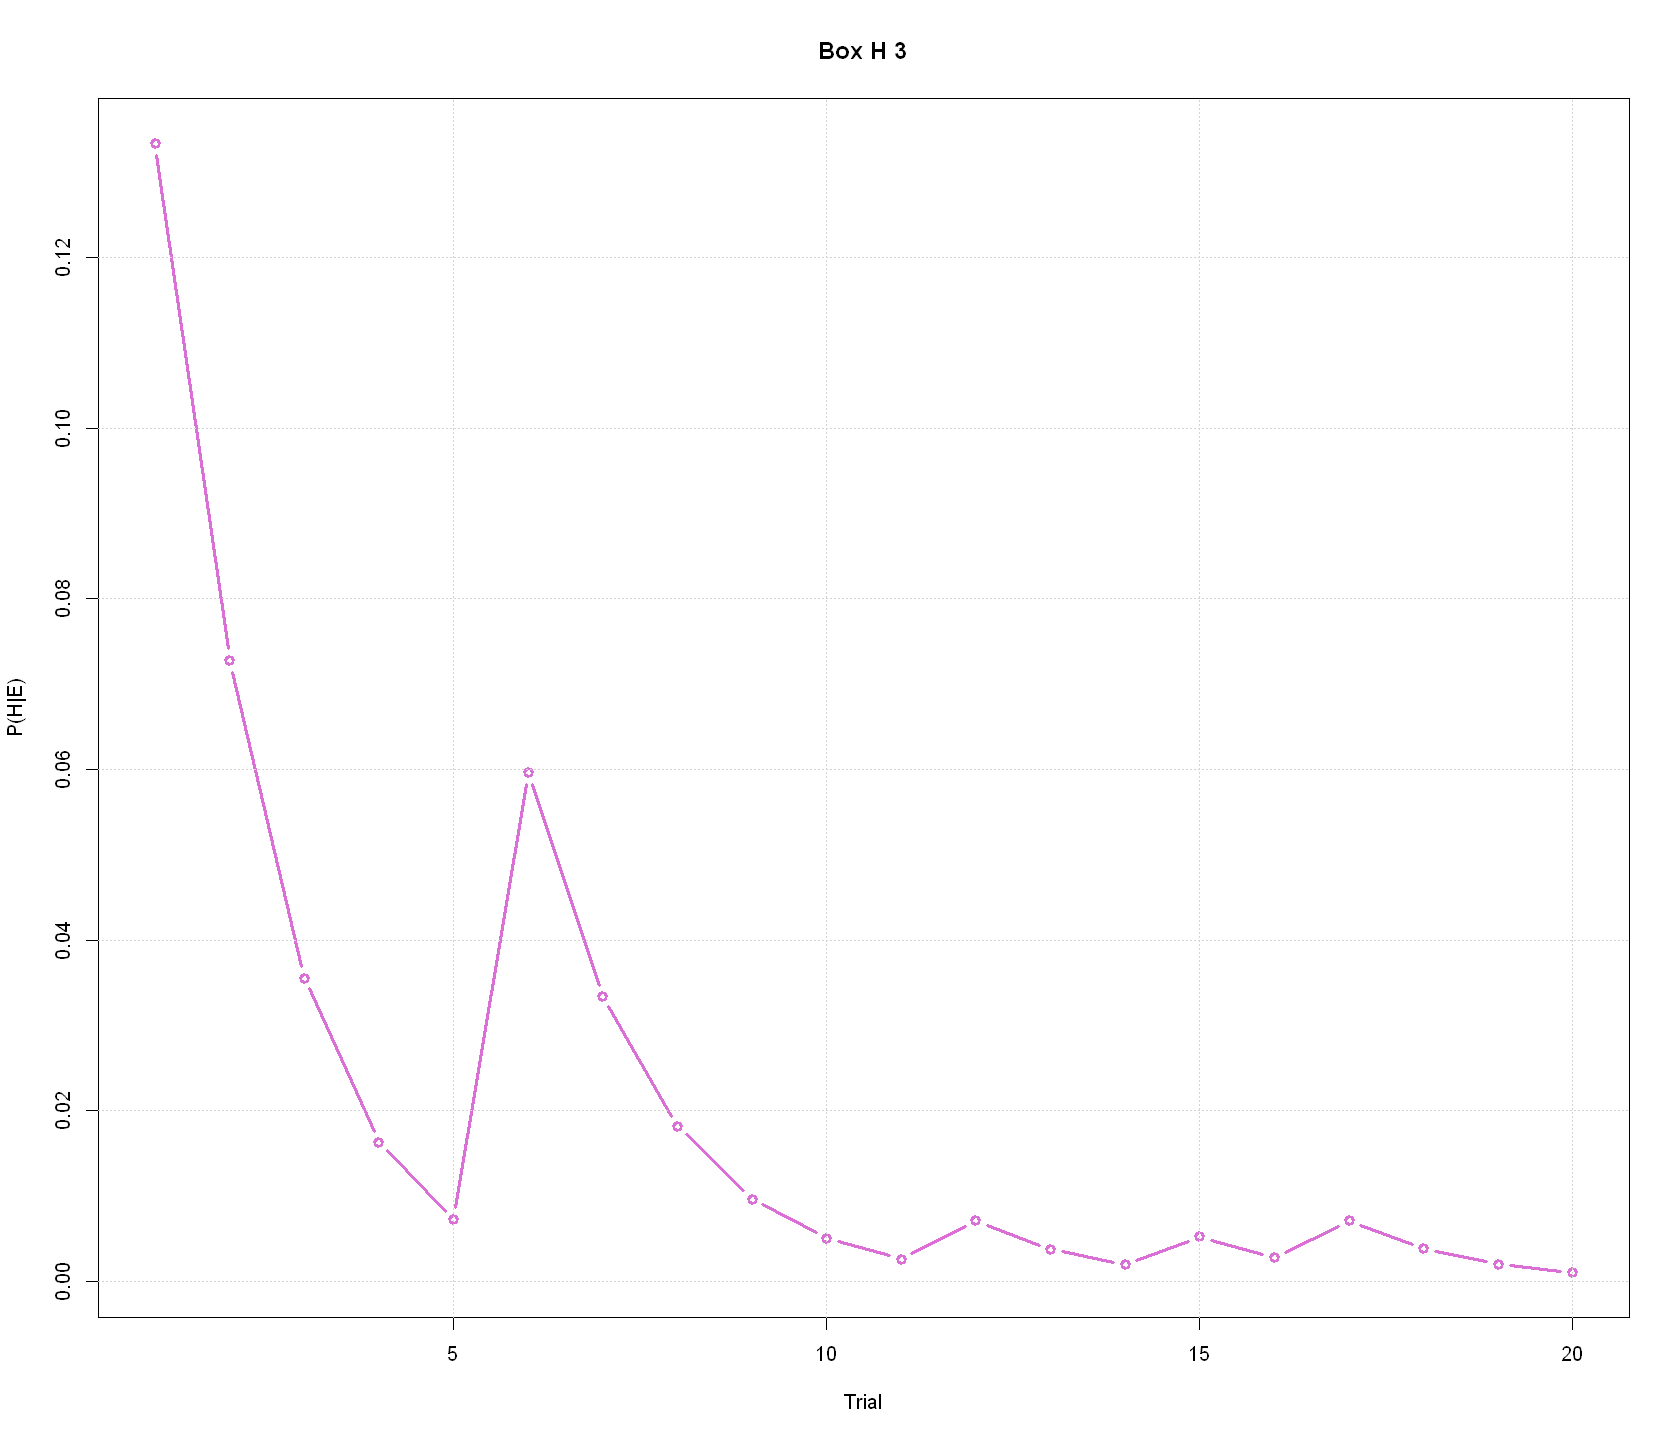

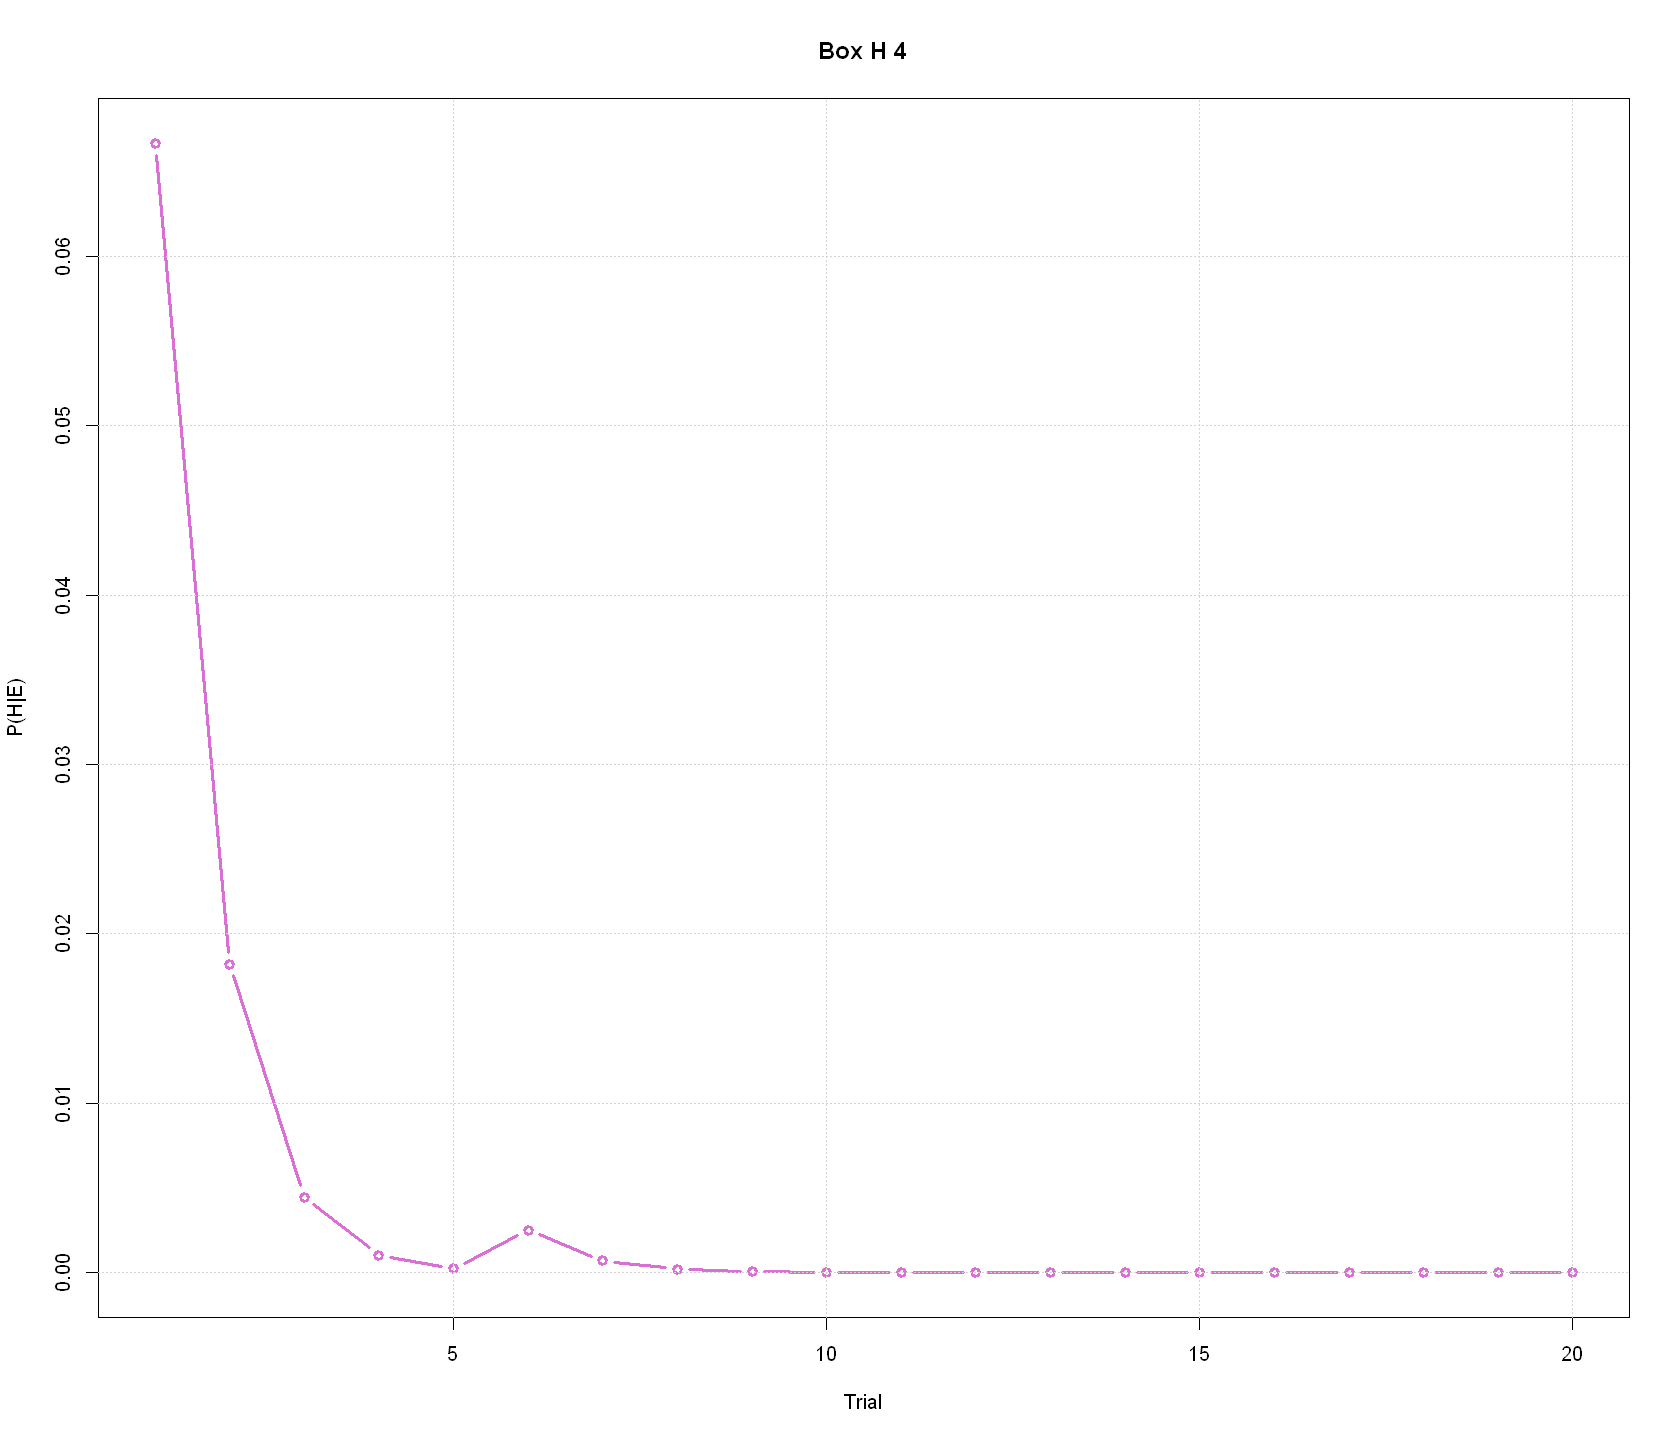

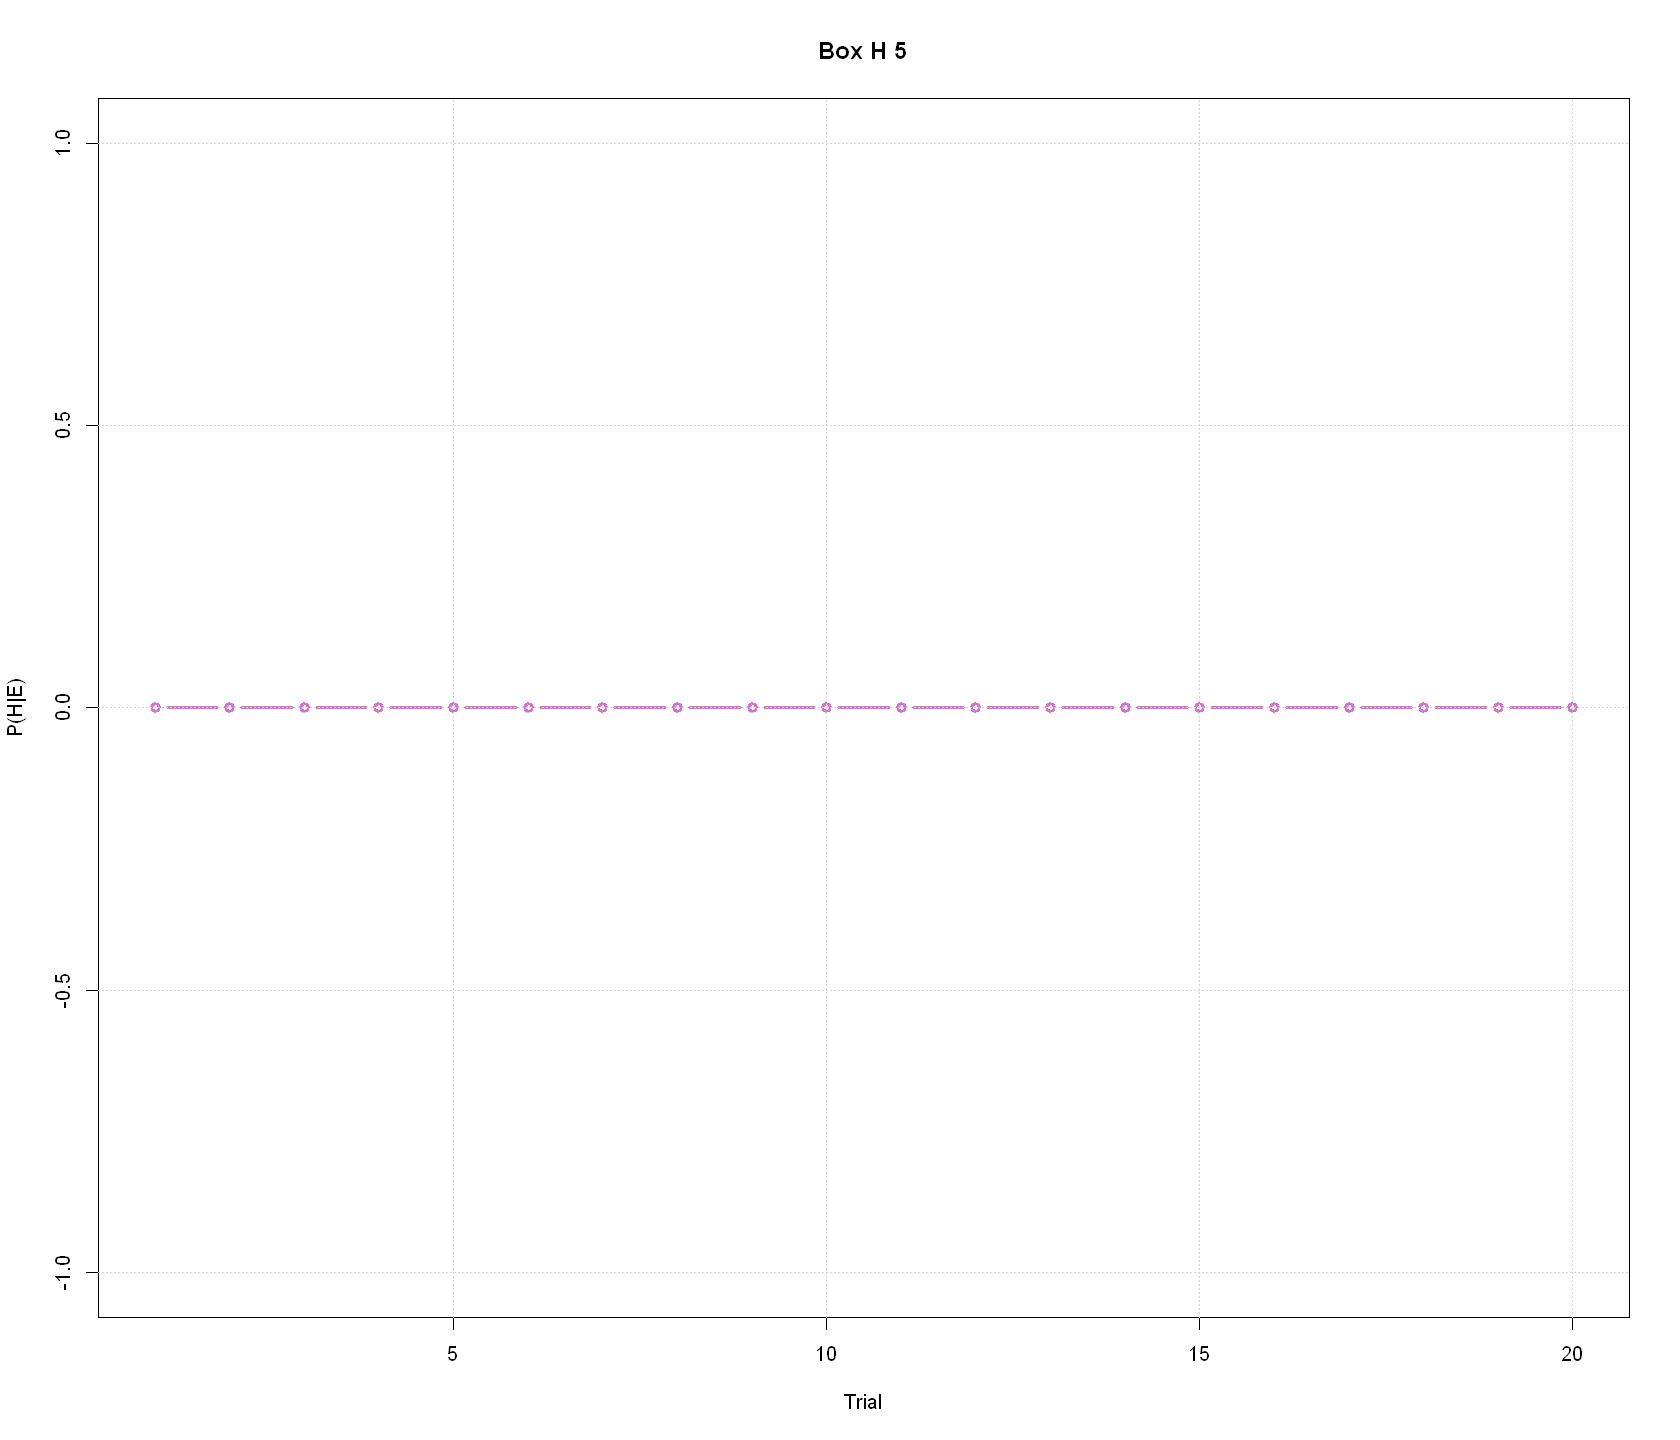

In [420]:
#PLOTS
for (p in 1:6){
    name=paste("Box H",p-1)
    plot(trials,H_all[,p],main=name,type="b",lwd="3",col="orchid",xlab="Trial",ylab="P(H|E)")
    grid()
}